<a href="https://colab.research.google.com/github/coutosergio/coutosergio/blob/main/Analise_Descritiva_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv, LinAlgError
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
import seaborn as sns

In [73]:
dados = pd.read_csv('/content/CarPrice_Assignment.csv')
dados['price'].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


In [74]:
dados = pd.read_csv('/content/CarPrice_Assignment.csv')
marca = dados.pop('CarName').str.split().str[0]

dados.insert(3, 'Company', marca)

dados['Company'] = dados.Company.str.lower()

def substituir(a,b):
    dados.Company.replace(a,b,inplace=True)

substituir('vw','volkswagen')
substituir('maxda','mazda')
substituir('vokswagen','volkswagen')
substituir('porcshce','porsche')
substituir('toyouta','toyota')

dados['symboling'] = dados['symboling'].astype('object')
dados = dados.drop(columns=['car_ID'])

dados_numeric = dados.select_dtypes(include=['int64','float64'])
dados_categorico = dados.select_dtypes(include=['object'])

dados_categorico.insert(loc = 0, column = 'price', value = dados['price'])

/tmp/ipython-input-74-1226965416.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados.Company.replace(a,b,inplace=True)


In [76]:
dados_numeric.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [77]:
dados_numeric['peakrpm'] = np.log(dados_numeric['peakrpm'])
dados_numeric['curbweight'] = np.log(dados_numeric['curbweight'])
dados_numeric['price'] = np.log(dados_numeric['price'])


dados_numeric[['price','peakrpm','curbweight']].describe()

,price,peakrpm,curbweight
count,205.000000,205.000000,205.000000
mean,9.354679,8.537564,7.826226
std,0.503805,0.093747,0.197957
min,8.540519,8.330864,7.305188
25%,8.960339,8.476371,7.670895
50%,9.239414,8.556414,7.789040
75%,9.711297,8.612503,7.984463
max,10.723267,8.794825,8.310415


In [ ]:
dados_categorico['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
dados_categorico['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
dados['price'] = np.log(dados['price'])
dados['price'].describe()

,price
count,205.000000
mean,9.354679
std,0.503805
min,8.540519
25%,8.960339
50%,9.239414
75%,9.711297
max,10.723267


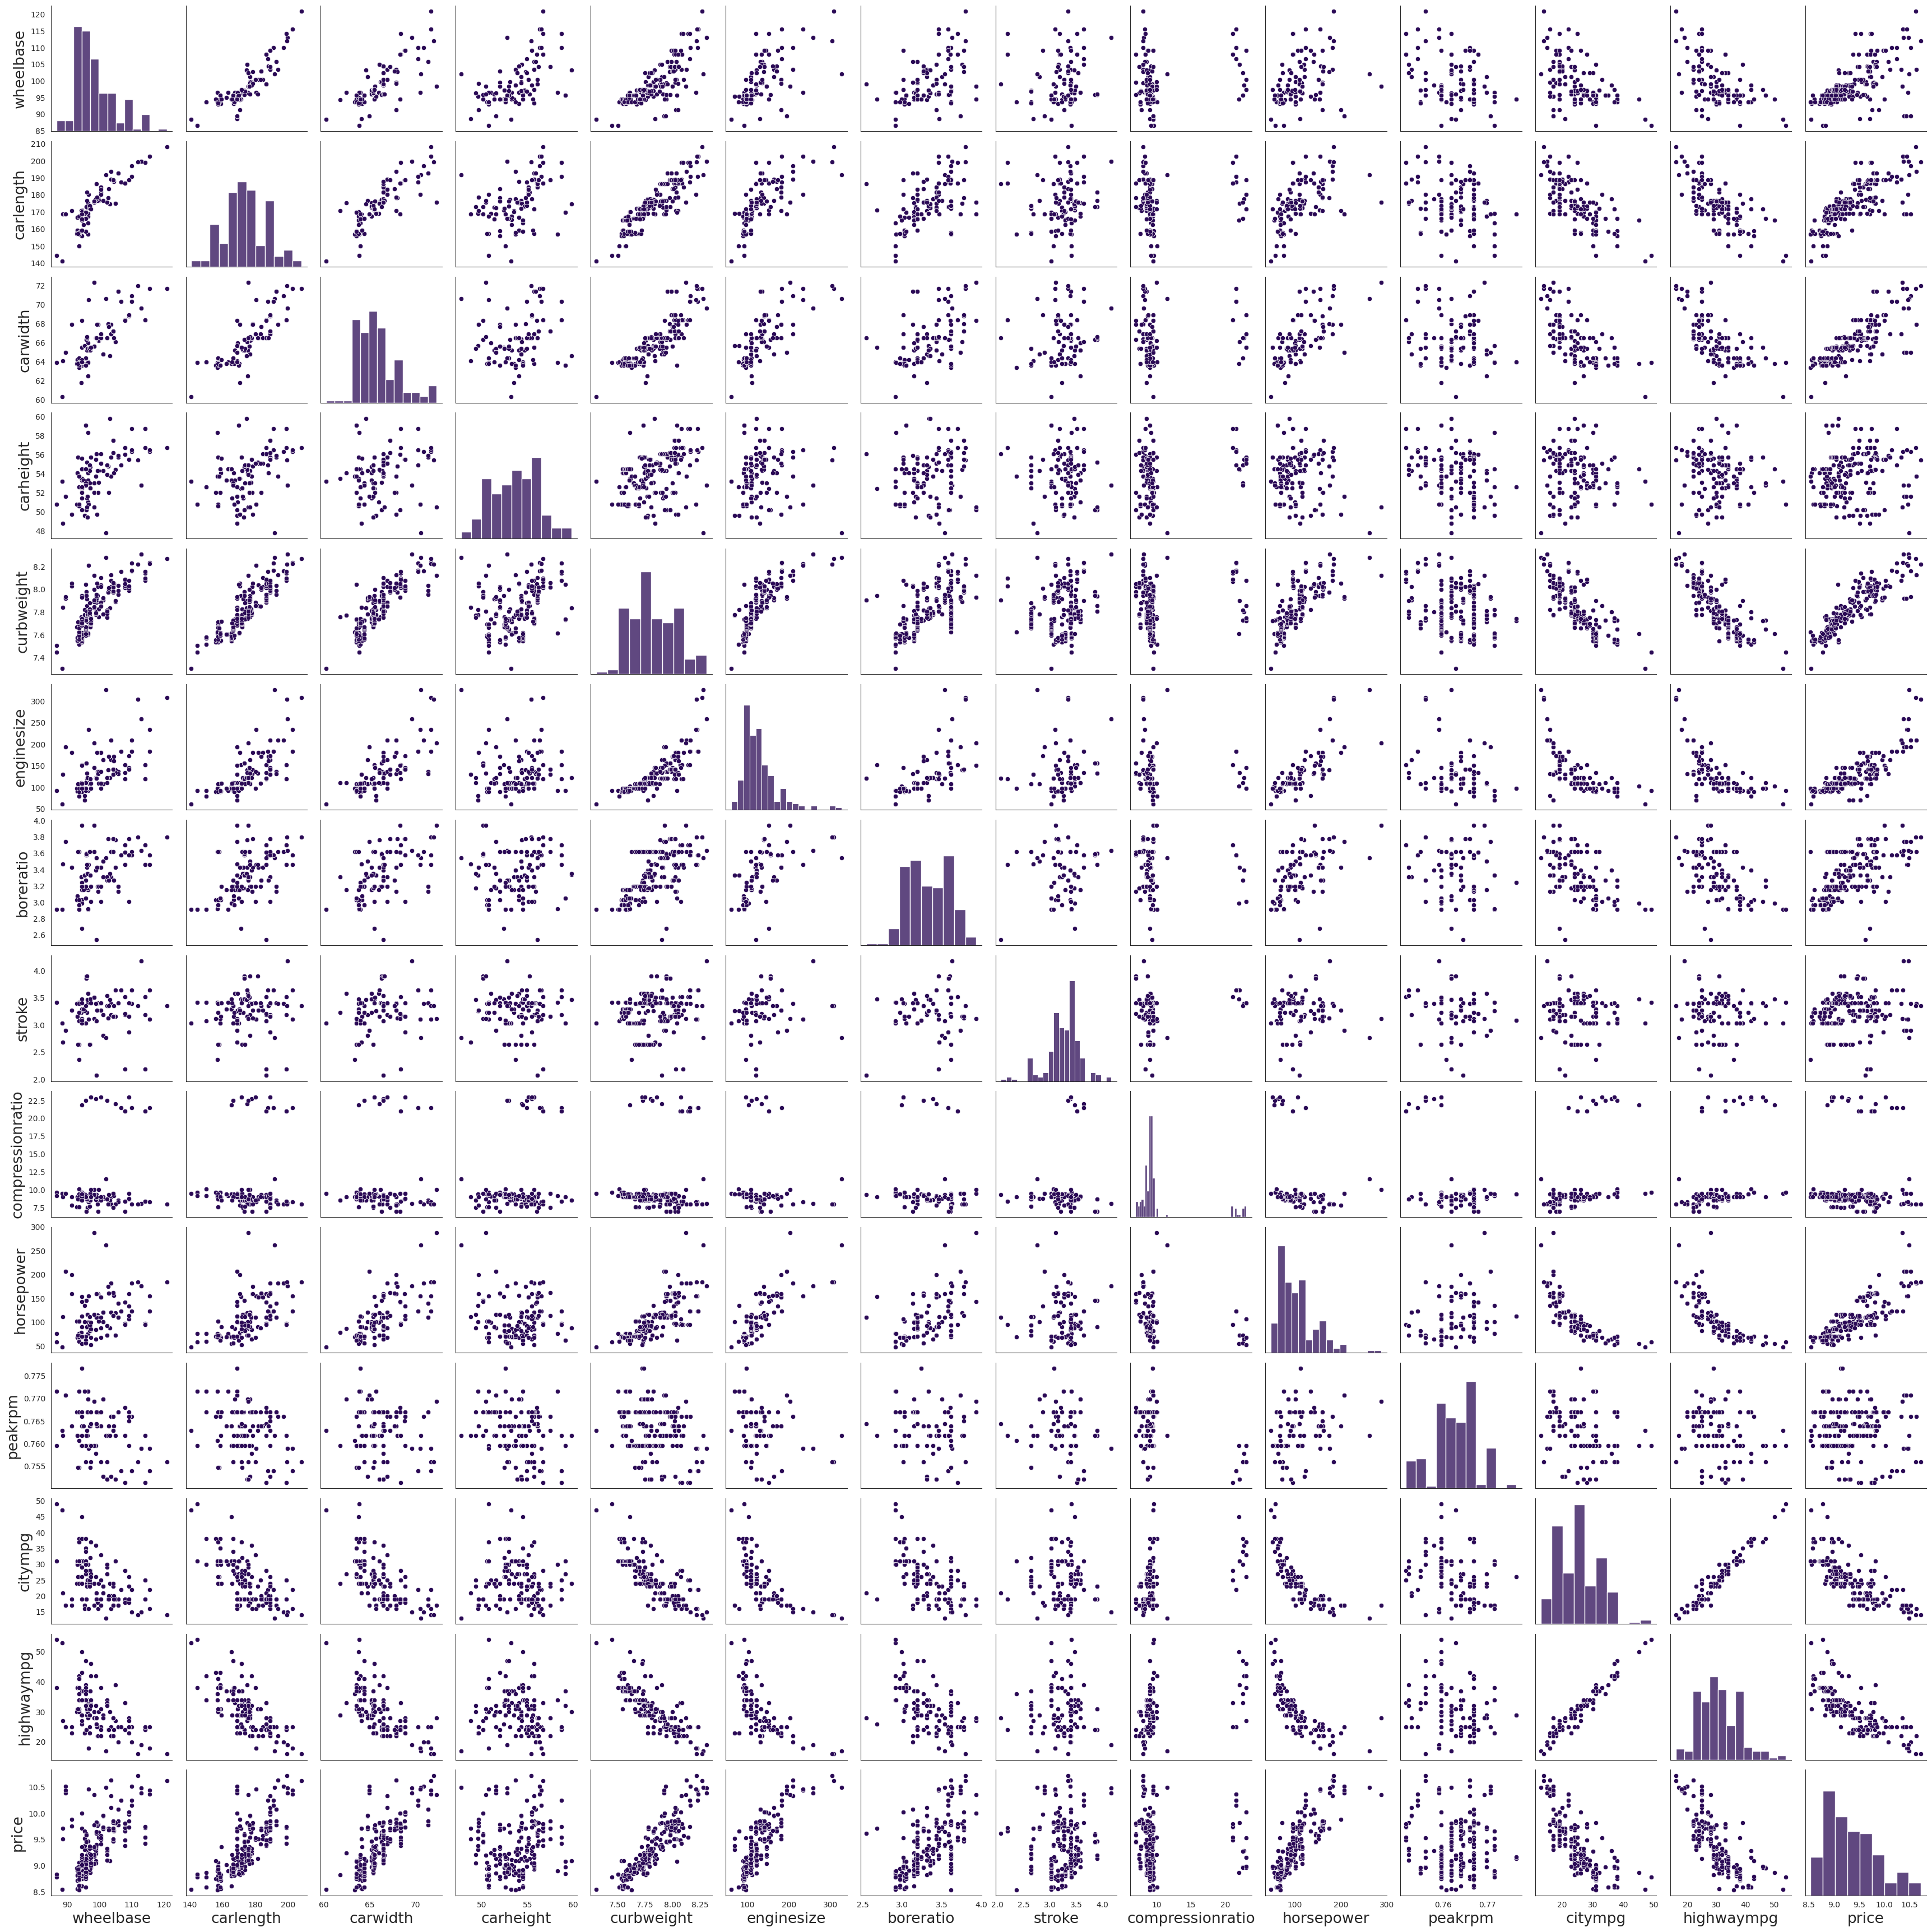

In [72]:
# Gera seu pairplot exatamente como está
sns.set_style("white")
g = sns.pairplot(dados_numeric,
                 plot_kws={'color': "#2B0A56"},
                 diag_kws={'color': "#2B0A56"}
                 )   # ou remova hue se não usar

# Aumenta o tamanho das labels Y só na primeira coluna
for ax in g.axes[:, 0]:
    ax.yaxis.label.set_size(19)   # teste valores entre 10 e 14 até ficar do seu gosto

# Aumenta o tamanho das labels X só na última linha
for ax in g.axes[-1, :]:
    ax.xaxis.label.set_size(19)

# (Opcional) Se quiser, torque um pouco a rotação dos x-labels para não embolar:#
#for ax in g.axes[-1, :]:
#    ax.tick_params(axis='x', labelrotation=45)

# Salva em PDF normalmente
g.fig.savefig(
    "pairplot_tcc_v1.pdf",
    format="pdf",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.1
)

plt.show()

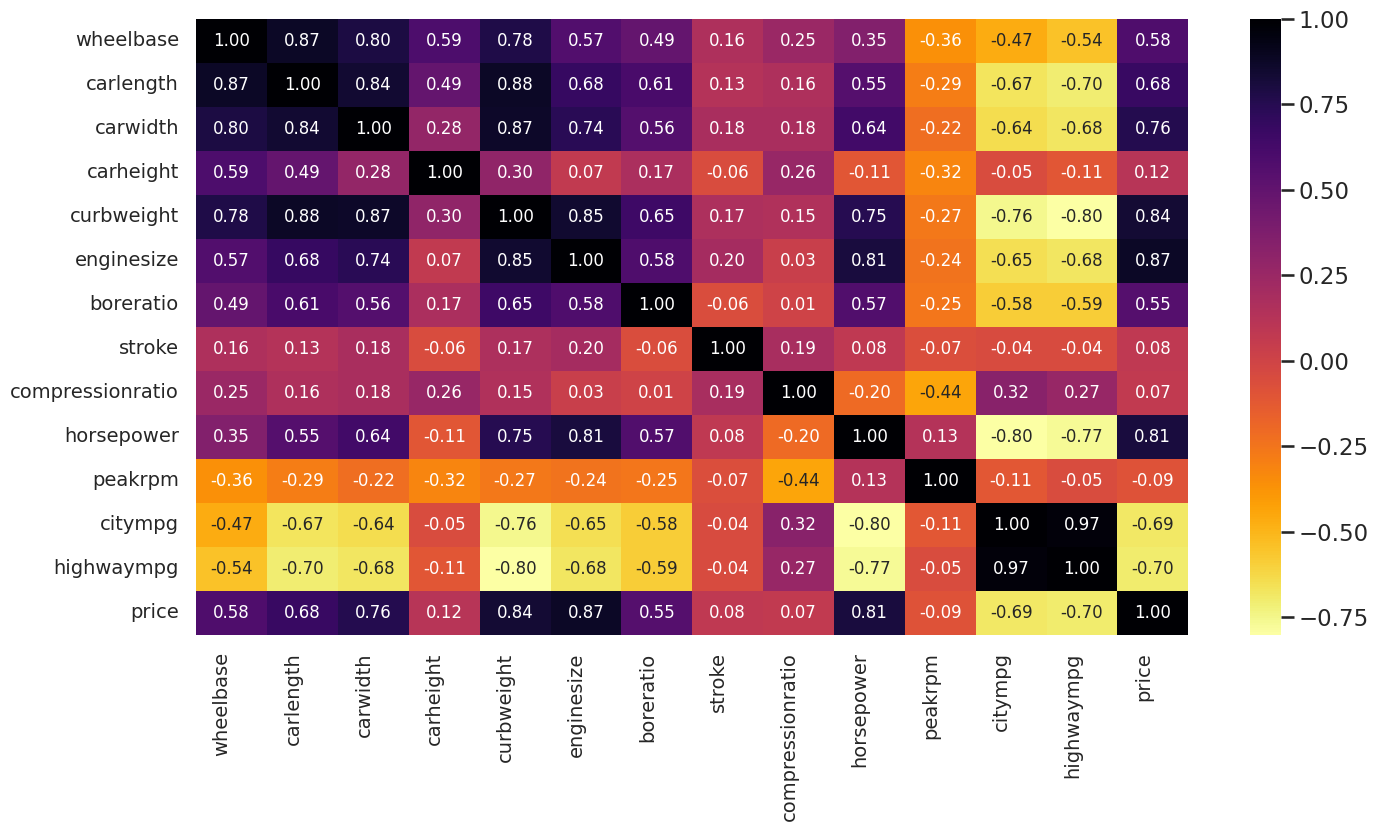

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = dados_numeric.corr()

sns.set_style("white")
sns.set_context("talk", font_scale=1)


plt.figure(figsize=(16, 8))

sns.heatmap(
    cor,
    cmap="inferno_r",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12},
)


plt.xticks(rotation=90, ha="right", fontsize=14)
plt.yticks(rotation=0, fontsize=14)


plt.savefig(
    "heatmap_correlacao_final.pdf",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [ ]:
# Supondo que você tenha um DataFrame df e
# sua variável de interesse esteja na coluna 'variavel'
serie = dados['price']

# 1. Quartis
Q1 = serie.quantile(0.25)
Q3 = serie.quantile(0.75)

# 2. IQR
IQR = Q3 - Q1

# 3. Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 4. Seleciona os outliers
outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]

# 5. Conta
n_outliers = outliers.count()
print(f'Número de outliers: {n_outliers}')

Número de outliers: 15


In [ ]:
print(outliers.sort_values())

15     30760.0
129    31400.5
70     31600.0
47     32250.0
126    32528.0
127    34028.0
71     34184.0
72     35056.0
48     35550.0
49     36000.0
17     36880.0
128    37028.0
73     40960.0
16     41315.0
74     45400.0
Name: price, dtype: float64


In [ ]:
dados['carbody'].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


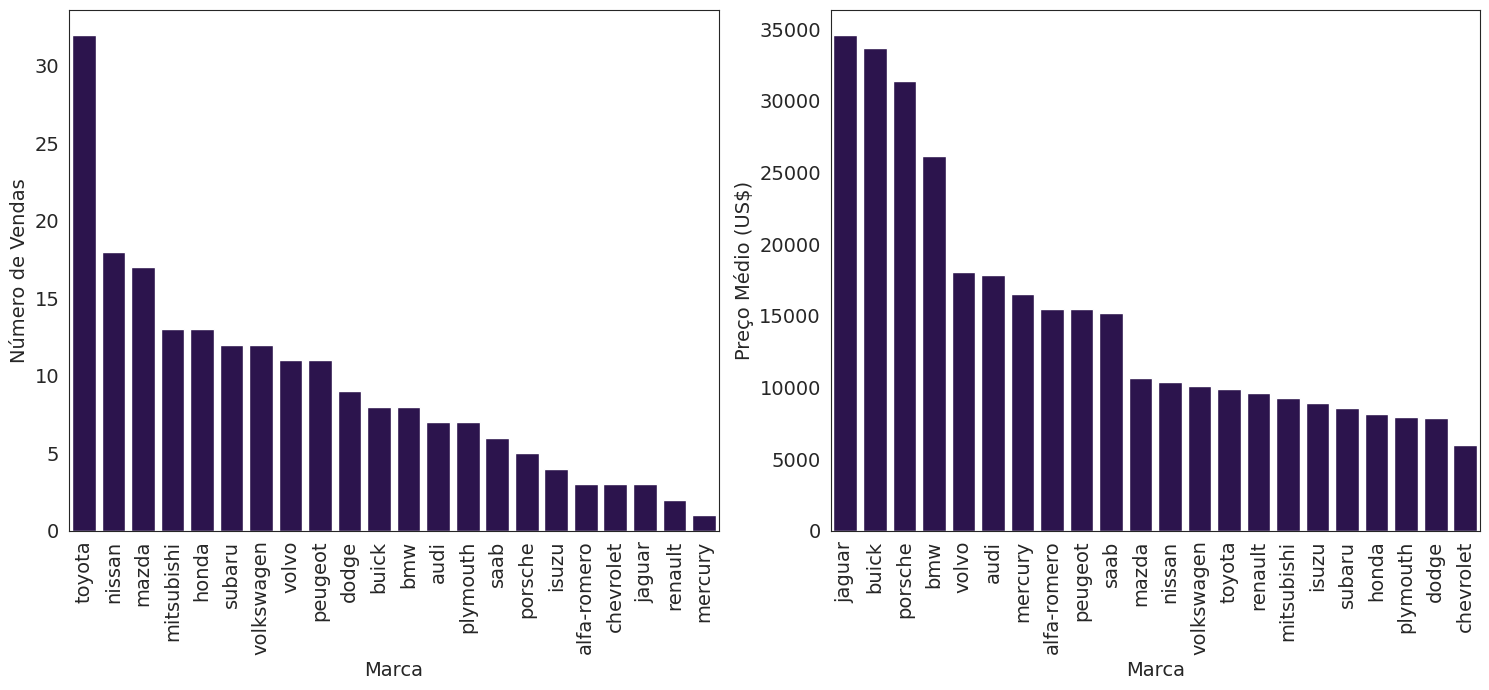

In [15]:
preco_medio_por_marca = (
    dados_categorico.groupby("Company")["price"]
      .mean()
      .rename("MeanPrice")
      .reset_index()
)

contagem_por_marca = (
    dados_categorico["Company"]
    .value_counts()
    .rename_axis("Company")
    .reset_index(name="Count")
)


contagem_por_marca = contagem_por_marca.sort_values("Count", ascending=False)
ordem_contagem = contagem_por_marca["Company"].tolist()


preco_medio_por_marca = preco_medio_por_marca.sort_values("MeanPrice", ascending=False)
ordem_preco = preco_medio_por_marca["Company"].tolist()


plt.figure(figsize=(15, 7))  # Largura x Altura (em polegadas); ajuste conforme quiser

# === 5.1) Subplot da esquerda: Contagem de vendas por marca ===
ax1 = plt.subplot(1, 2, 1)  # (nrows, ncols, index)
sns.barplot(
    x="Company",
    y="Count",
    data=contagem_por_marca,
    order=ordem_contagem,
    color ="#2B0A56",      # você pode trocar a paleta (ex: "inferno", "viridis", "Greys_d" etc.)
    ax=ax1
)
#ax1.set_title("(a)", fontsize=14, pad=10)
ax1.set_xlabel("Marca", fontsize=14)
ax1.set_ylabel("Número de Vendas", fontsize=14)
ax1.tick_params(axis="x", rotation=90, labelsize = 14)
ax1.tick_params(axis="y", labelsize=14)

# === 5.2) Subplot da direita: Preço médio por marca ===
ax2 = plt.subplot(1, 2, 2)
sns.barplot(
    x="Company",
    y="MeanPrice",
    data=preco_medio_por_marca,
    order=ordem_preco,
    color= "#2B0A56",    # troque a paleta se quiser
    ax=ax2
)
#ax2.set_title("(b)", fontsize=14, pad=10)
ax2.set_xlabel("Marca", fontsize=14)
ax2.set_ylabel("Preço Médio (US$)", fontsize=14)
ax2.tick_params(axis="x", rotation=90, labelsize = 14)
ax2.tick_params(axis="y", labelsize=14)

plt.tight_layout()
plt.savefig('histograma_marca_final.pdf',    # nome do arquivo (pode ser .png, .pdf, .svg, .jpg…)
            dpi=300,                     # resolução em pontos por polegada
            bbox_inches='tight')
plt.show()

In [ ]:
preco_medio_por_marca

,Company,MeanPrice
8,jaguar,34600.000000
3,buick,33647.000000
15,porsche,31400.500000
2,bmw,26118.750000
21,volvo,18063.181818
1,audi,17859.166714
10,mercury,16503.000000
0,alfa-romero,15498.333333
13,peugeot,15489.090909
17,saab,15223.333333


<Figure size 1500x500 with 0 Axes>

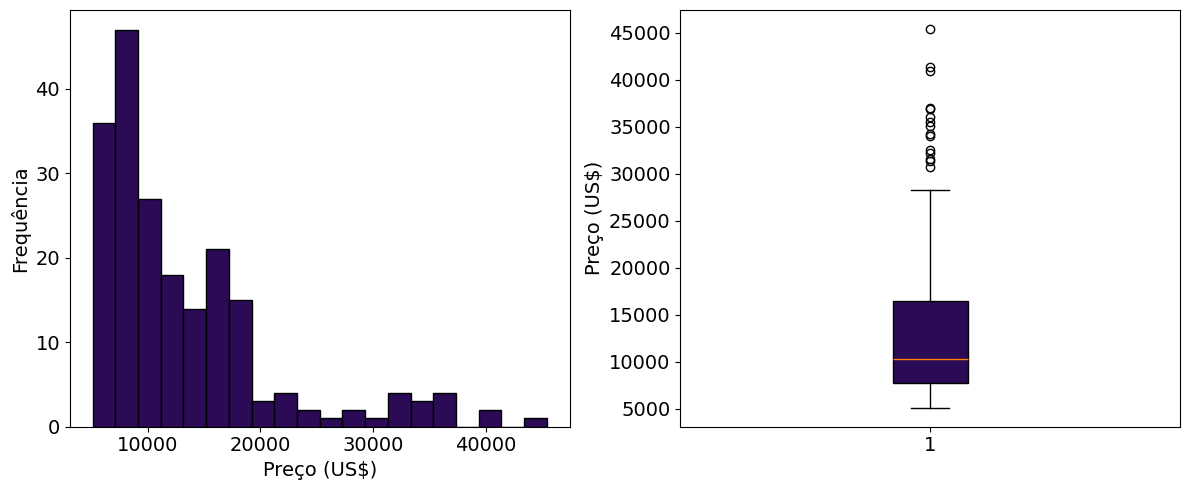

In [30]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['price'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('Preço (US$)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['price'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('Preço (US$)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_preço_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

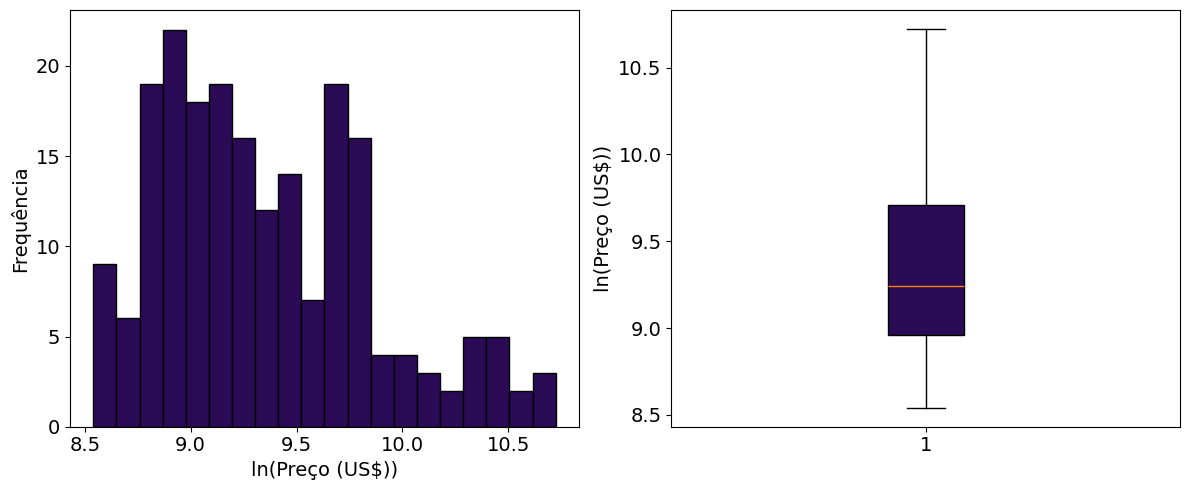

In [32]:
#dados_numeric['price'] = np.log(dados_numeric['price'])
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['price'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('ln(Preço (US$))', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['price'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('ln(Preço (US$))', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_ln_preço_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

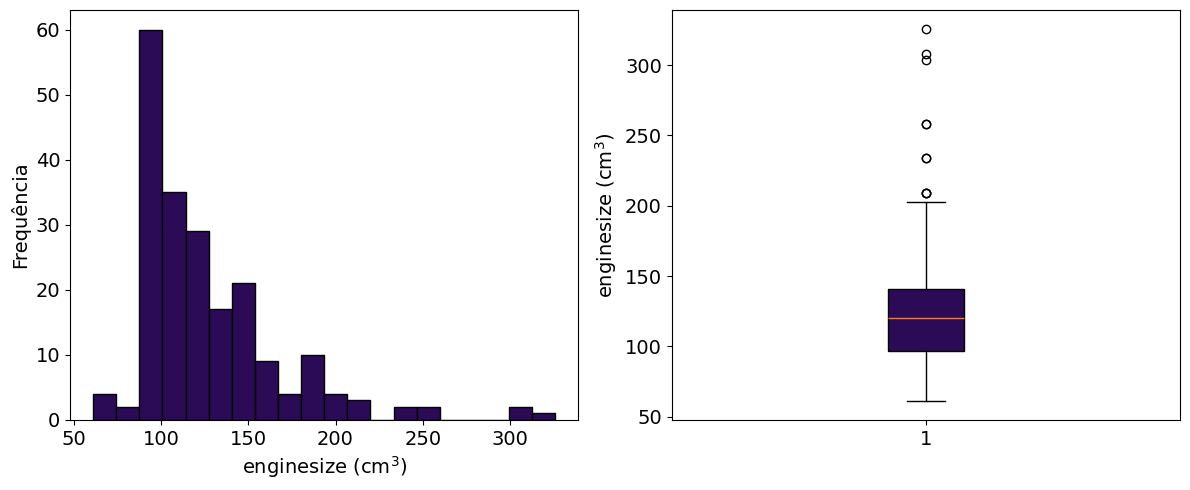

In [33]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['enginesize'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('enginesize (cm$^3$)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['enginesize'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('enginesize (cm$^3$)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_enginesize_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

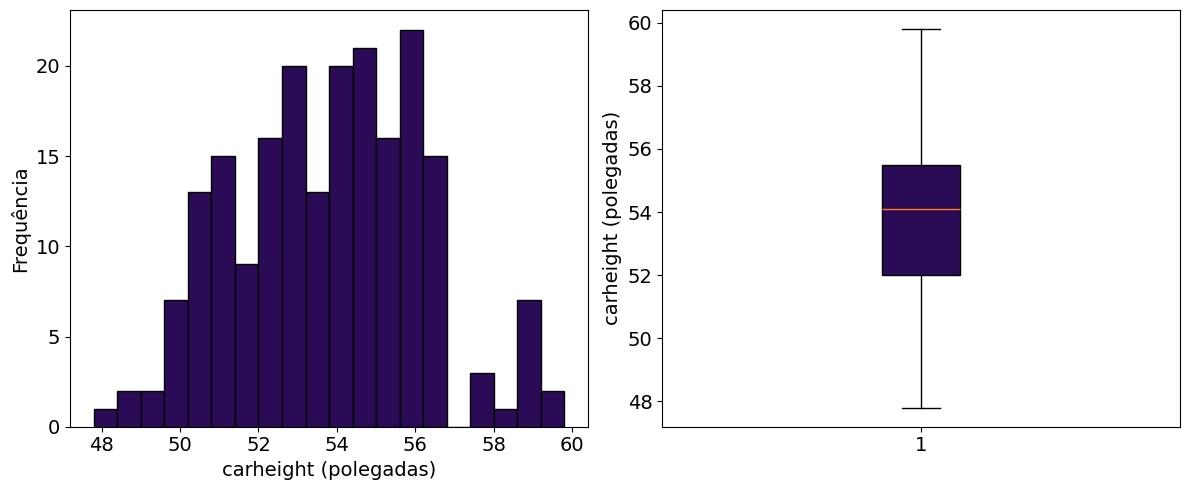

In [34]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['carheight'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('carheight (polegadas)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['carheight'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('carheight (polegadas)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_carheight_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

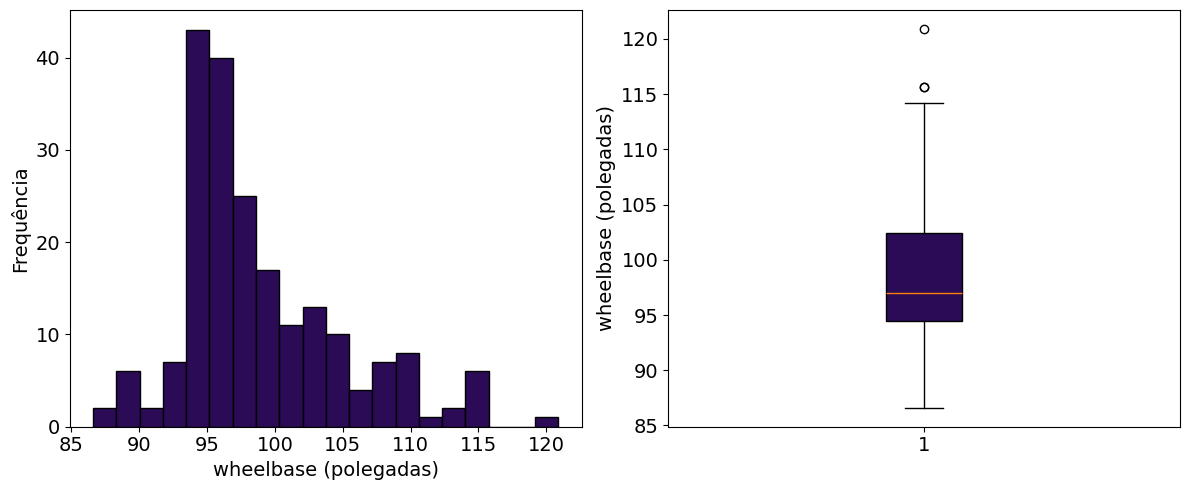

In [37]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['wheelbase'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('wheelbase (polegadas)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['wheelbase'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('wheelbase (polegadas)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_wheelbase_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

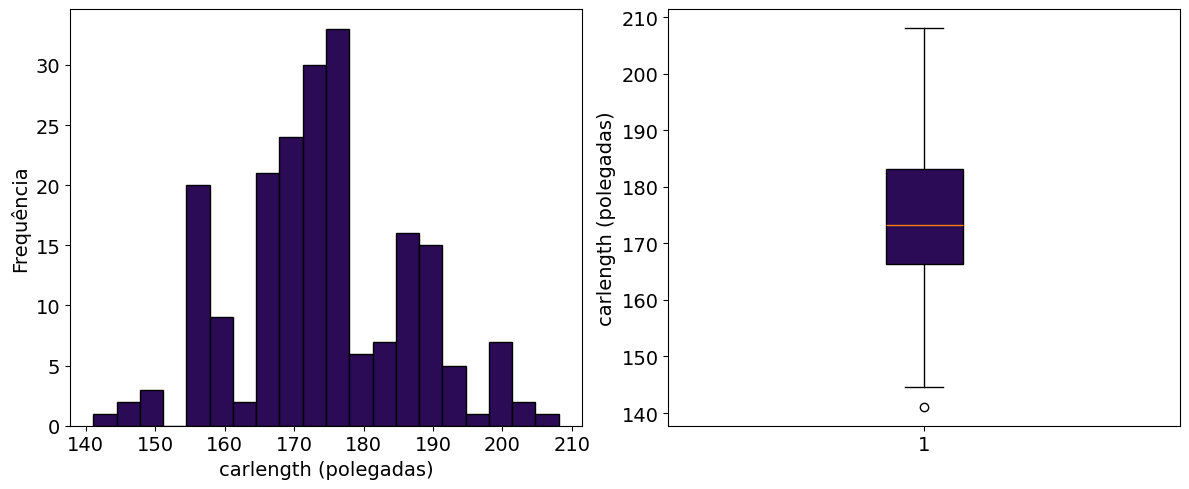

In [40]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['carlength'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('carlength (polegadas)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['carlength'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('carlength (polegadas)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_carlength_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

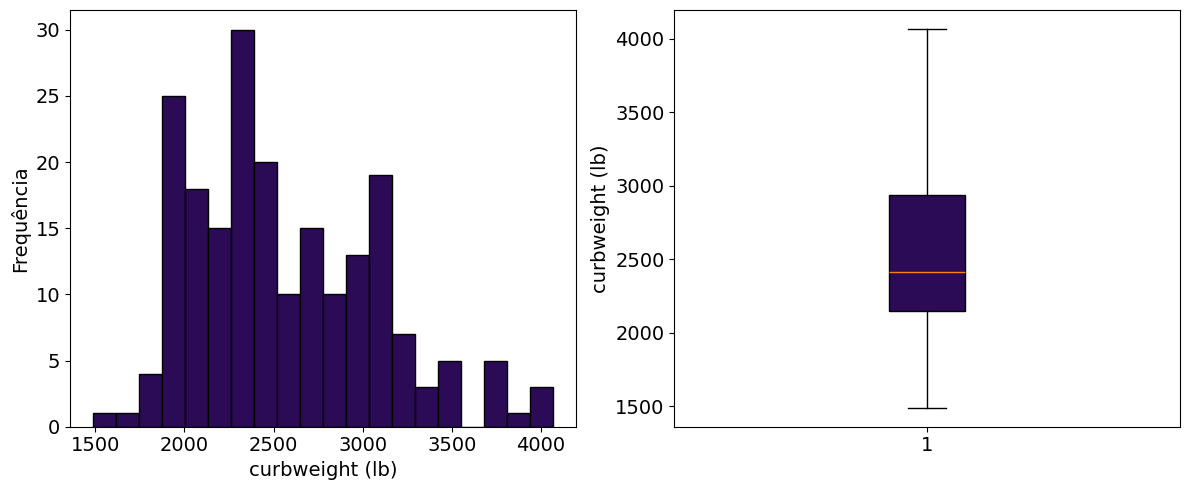

In [41]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['curbweight'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('curbweight (lb)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['curbweight'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('curbweight (lb)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_curbweight_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

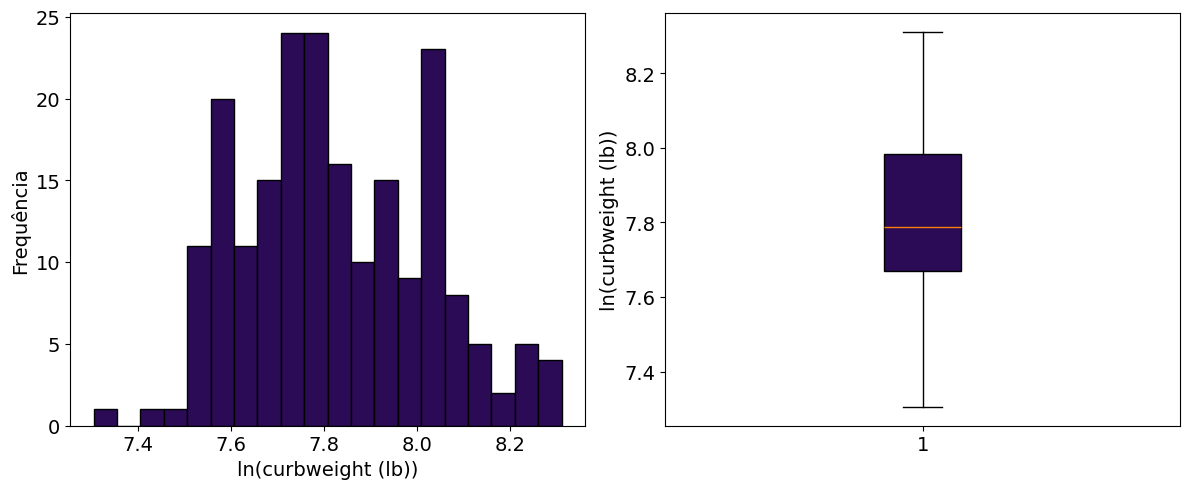

In [42]:
dados_numeric['curbweight'] = np.log(dados_numeric['curbweight'])
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['curbweight'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('ln(curbweight (lb))', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['curbweight'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('ln(curbweight (lb))', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_ln_curbweight_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

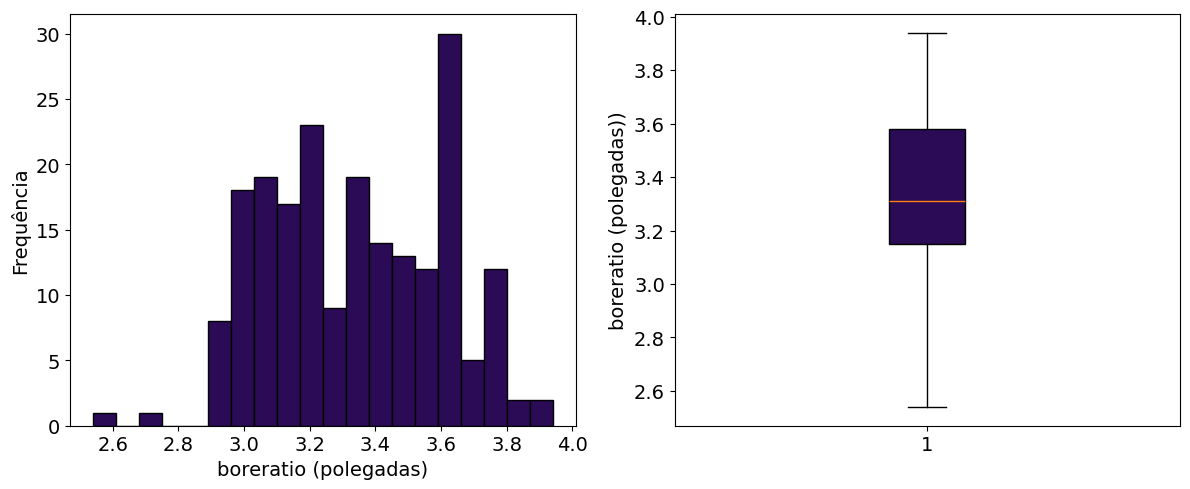

In [43]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['boreratio'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('boreratio (polegadas)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['boreratio'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('boreratio (polegadas))', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_boreratio_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

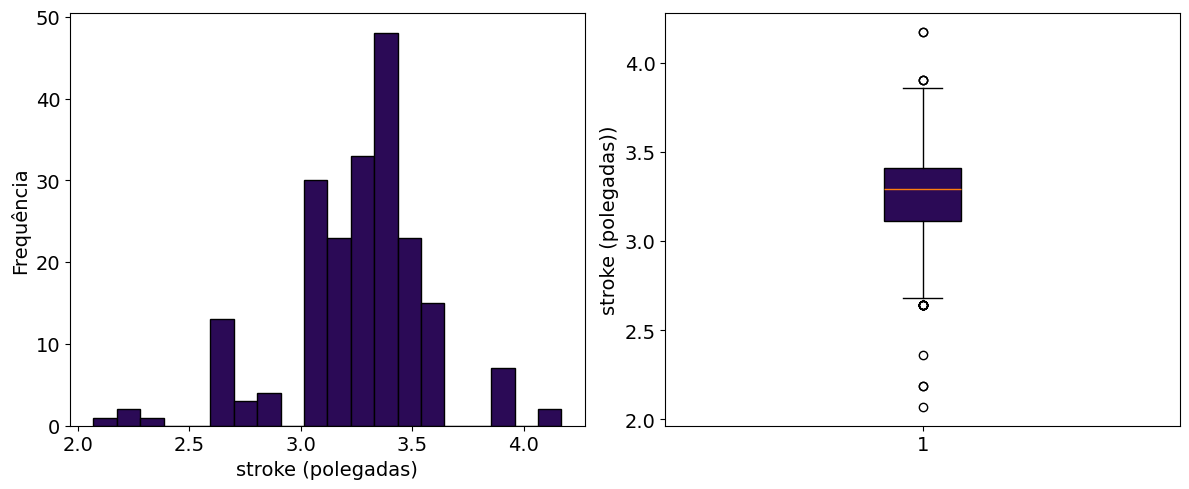

In [44]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['stroke'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('stroke (polegadas)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['stroke'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('stroke (polegadas))', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_stroke_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

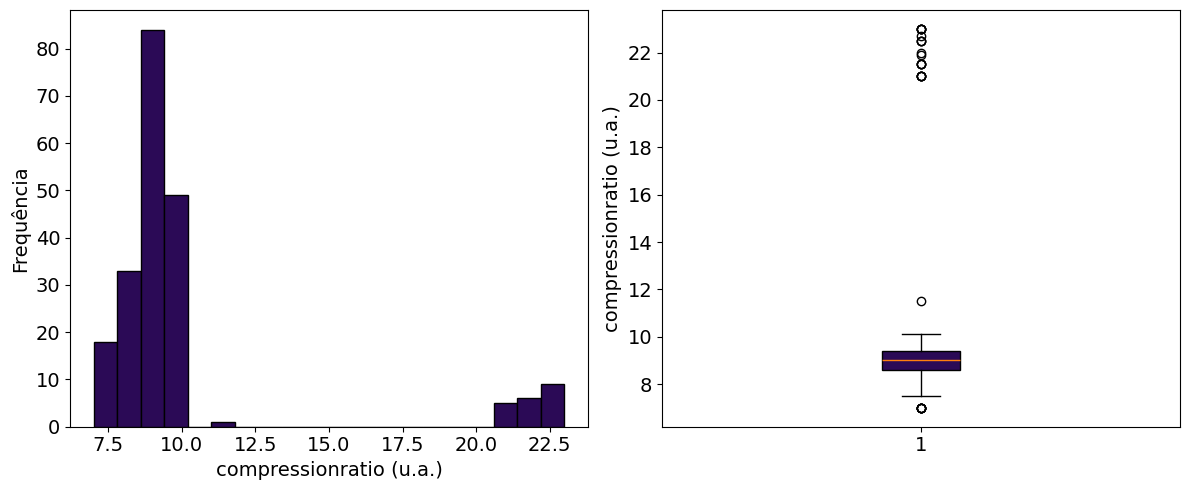

In [46]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['compressionratio'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('compressionratio (u.a.)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['compressionratio'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('compressionratio (u.a.)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_compressionratio_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

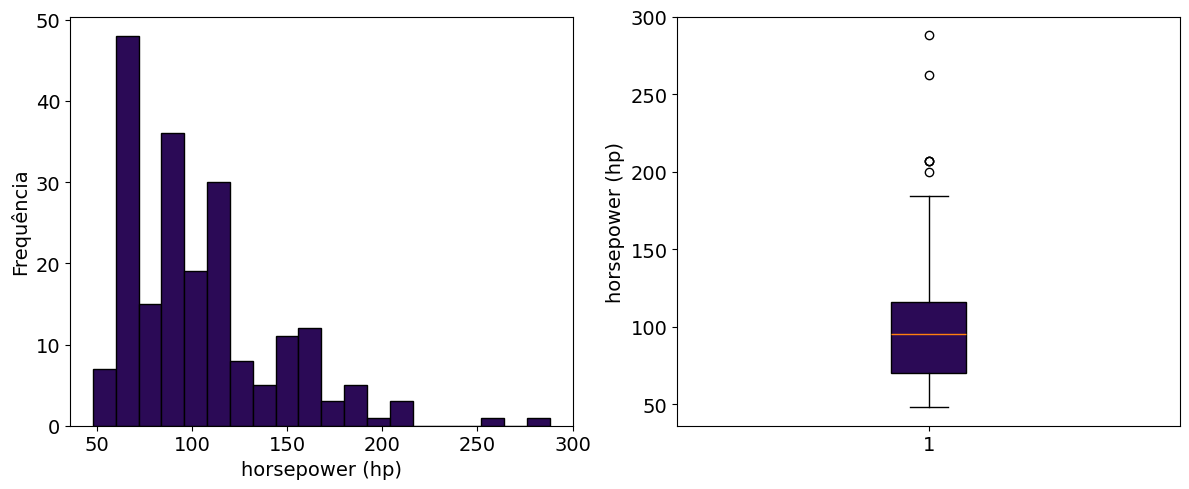

In [47]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['horsepower'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('horsepower (hp)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['horsepower'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('horsepower (hp)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_horsepower_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

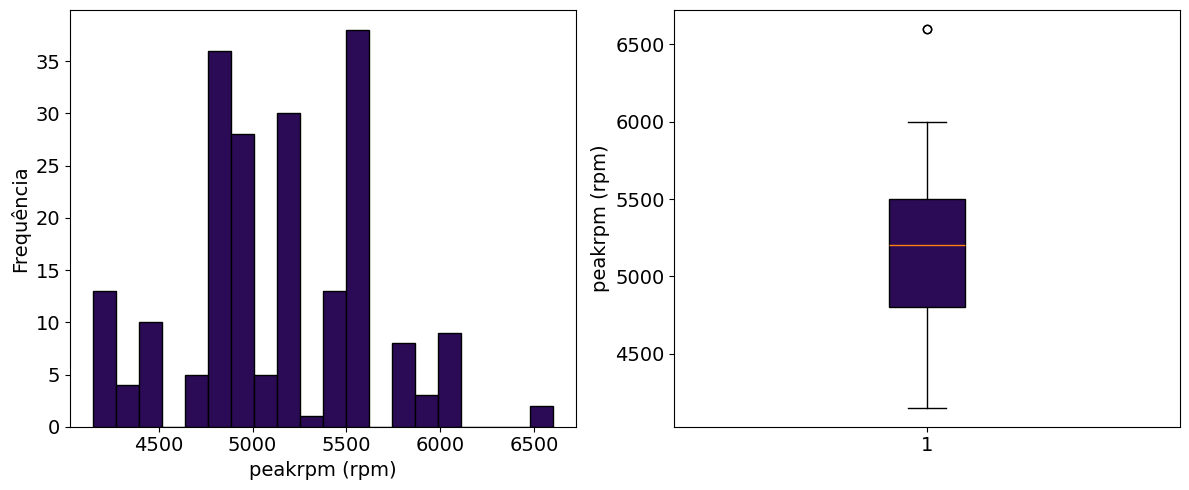

In [48]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['peakrpm'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('peakrpm (rpm)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['peakrpm'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('peakrpm (rpm)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_peakrpm_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

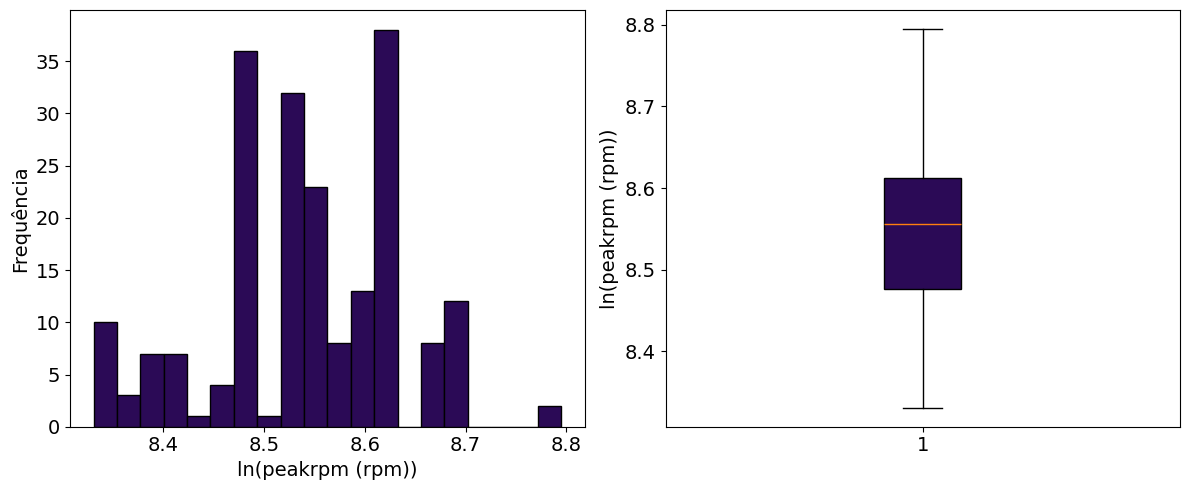

In [49]:
dados_numeric['peakrpm'] = np.log(dados_numeric['peakrpm'])
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['peakrpm'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('ln(peakrpm (rpm))', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['peakrpm'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('ln(peakrpm (rpm))', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_ln_peakrpm_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

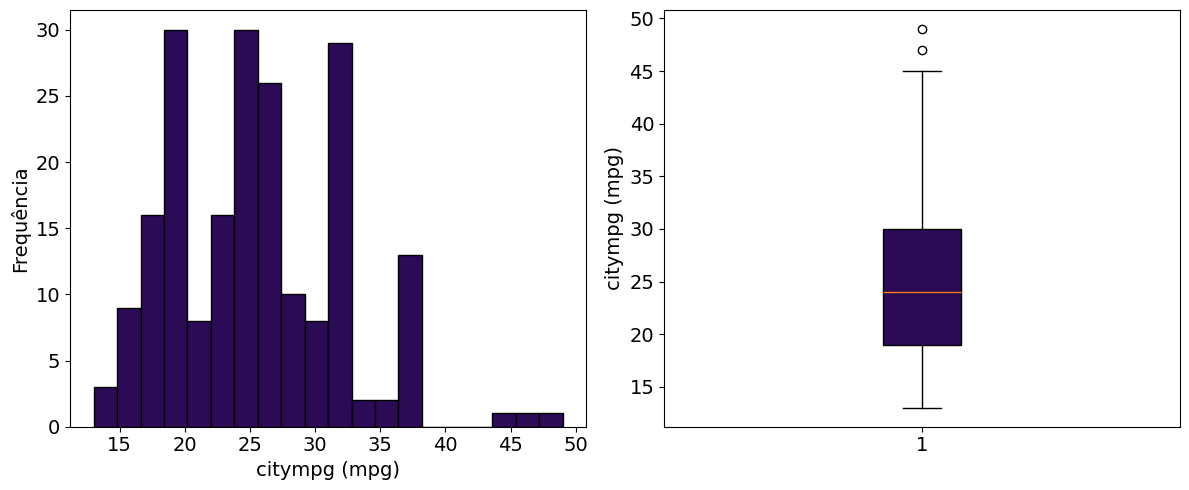

In [51]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['citympg'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('citympg (mpg)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['citympg'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('citympg (mpg)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_citympg_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

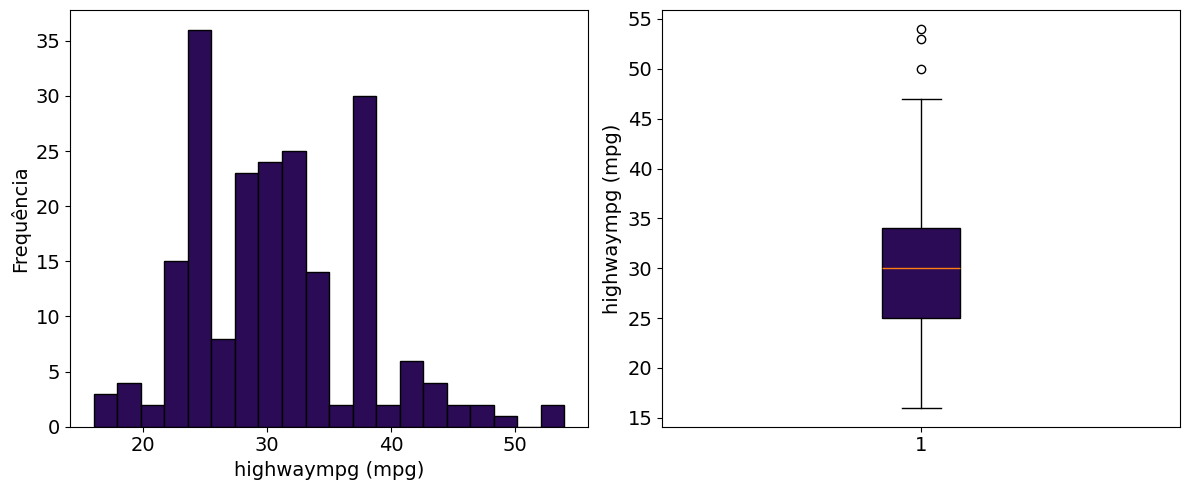

In [52]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(15, 5))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(dados_numeric['highwaympg'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('highwaympg (mpg)', fontsize = 14)
axes[0].set_ylabel('Frequência', fontsize = 14)


axes[1].boxplot(dados_numeric['highwaympg'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('highwaympg (mpg)', fontsize = 14)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14, rotation=0)  # x‑ticks em 14pt
    ax.tick_params(axis='y', labelsize=14)


plt.tight_layout()
plt.savefig('histograma_highwaympg_final.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

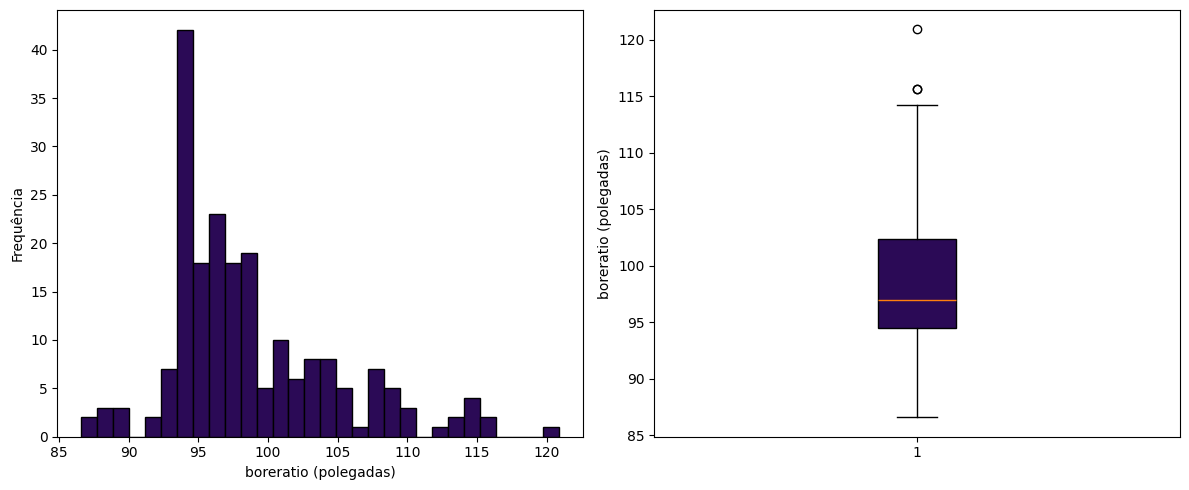

In [ ]:
plt.figure(figsize=(15, 5))  # Largura x Altura (em polegadas); ajuste conforme quiser

# Criando a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma à esquerda
axes[0].hist(dados_numeric['wheelbase'], bins=30, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('boreratio (polegadas)')
axes[0].set_ylabel('Frequência')

# Boxplot à direita
axes[1].boxplot(dados_numeric['wheelbase'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('boreratio (polegadas)')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('histograma_wheelbase.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dados['carheight'].describe()

,carheight
count,205.000000
mean,53.724878
std,2.443522
min,47.800000
25%,52.000000
50%,54.100000
75%,55.500000
max,59.800000


<Figure size 1500x500 with 0 Axes>

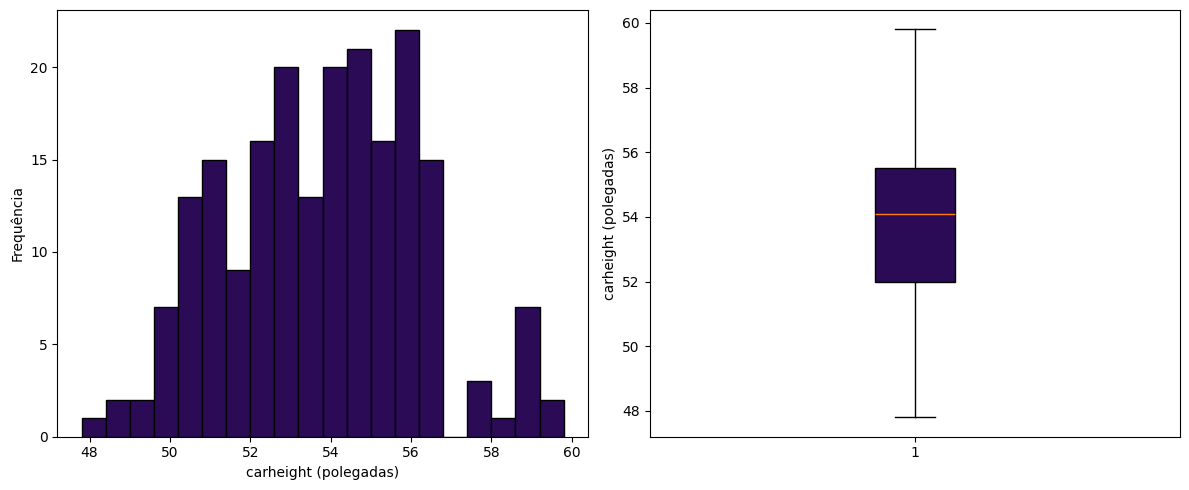

In [ ]:
plt.figure(figsize=(15, 5))  # Largura x Altura (em polegadas); ajuste conforme quiser

# Criando a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma à esquerda
axes[0].hist(dados_numeric['carheight'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('carheight (polegadas)')
axes[0].set_ylabel('Frequência')

# Boxplot à direita
axes[1].boxplot(dados_numeric['carheight'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('carheight (polegadas)')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('histograma_carheight.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

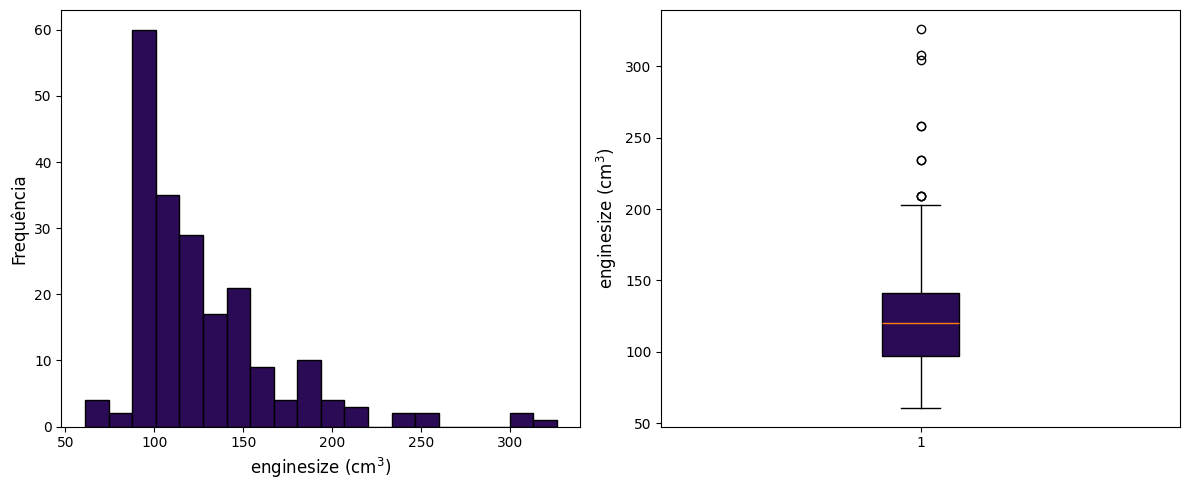

In [ ]:
plt.figure(figsize=(15, 5))  # Largura x Altura (em polegadas); ajuste conforme quiser

# Criando a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma à esquerda
axes[0].hist(dados_numeric['enginesize'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('enginesize (cm$^3$)',fontsize = 12)
axes[0].set_ylabel('Frequência',fontsize = 12)

# Boxplot à direita
axes[1].boxplot(dados_numeric['enginesize'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('enginesize (cm$^3$)',fontsize = 12)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('histograma_enginesize.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

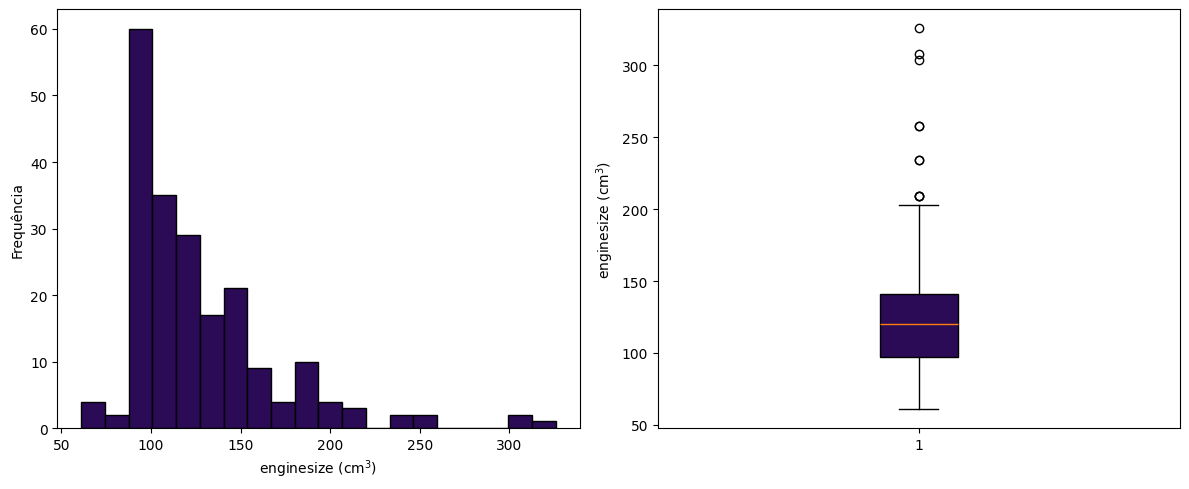

In [ ]:
plt.figure(figsize=(15, 5))  # Largura x Altura (em polegadas); ajuste conforme quiser

# Criando a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma à esquerda
axes[0].hist(dados_numeric['enginesize'], bins=20, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('enginesize (cm$^3$)')
axes[0].set_ylabel('Frequência')

# Boxplot à direita
axes[1].boxplot(dados_numeric['enginesize'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('enginesize (cm$^3$)')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('histograma_enginesize.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dados['enginesize'].describe()

,enginesize
count,205.000000
mean,126.907317
std,41.642693
min,61.000000
25%,97.000000
50%,120.000000
75%,141.000000
max,326.000000


In [ ]:
dados['curbweight'].describe()

,curbweight
count,205.000000
mean,2555.565854
std,520.680204
min,1488.000000
25%,2145.000000
50%,2414.000000
75%,2935.000000
max,4066.000000


In [ ]:
dados['curbweight'] = np.log(dados['curbweight'])
dados['curbweight'].describe()

,curbweight
count,205.000000
mean,7.826226
std,0.197957
min,7.305188
25%,7.670895
50%,7.789040
75%,7.984463
max,8.310415


<Figure size 1500x500 with 0 Axes>

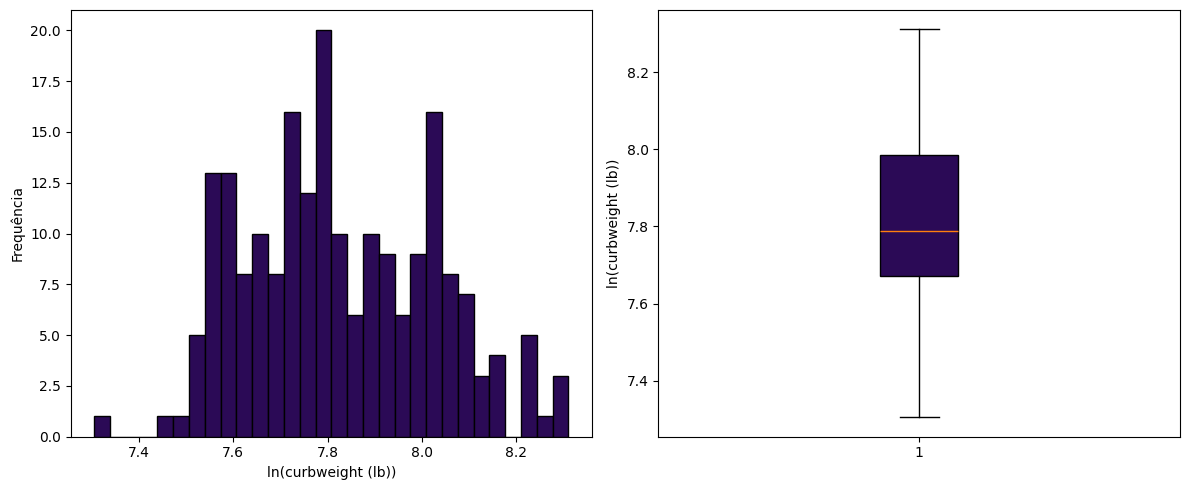

In [ ]:
plt.figure(figsize=(15, 5))  # Largura x Altura (em polegadas); ajuste conforme quiser

# Criando a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma à esquerda
axes[0].hist(dados['curbweight'], bins=30, color='#2B0A56', edgecolor='black')

axes[0].set_xlabel('ln(curbweight (lb))')
axes[0].set_ylabel('Frequência')

# Boxplot à direita
axes[1].boxplot(dados['curbweight'] ,vert=True, patch_artist=True, boxprops=dict(facecolor='#2B0A56'))
axes[1].set_ylabel('ln(curbweight (lb))')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.savefig('histograma_log_curbweight.pdf', dpi=300, bbox_inches='tight')
plt.show()

<Axes: xlabel='Company', ylabel='price'>

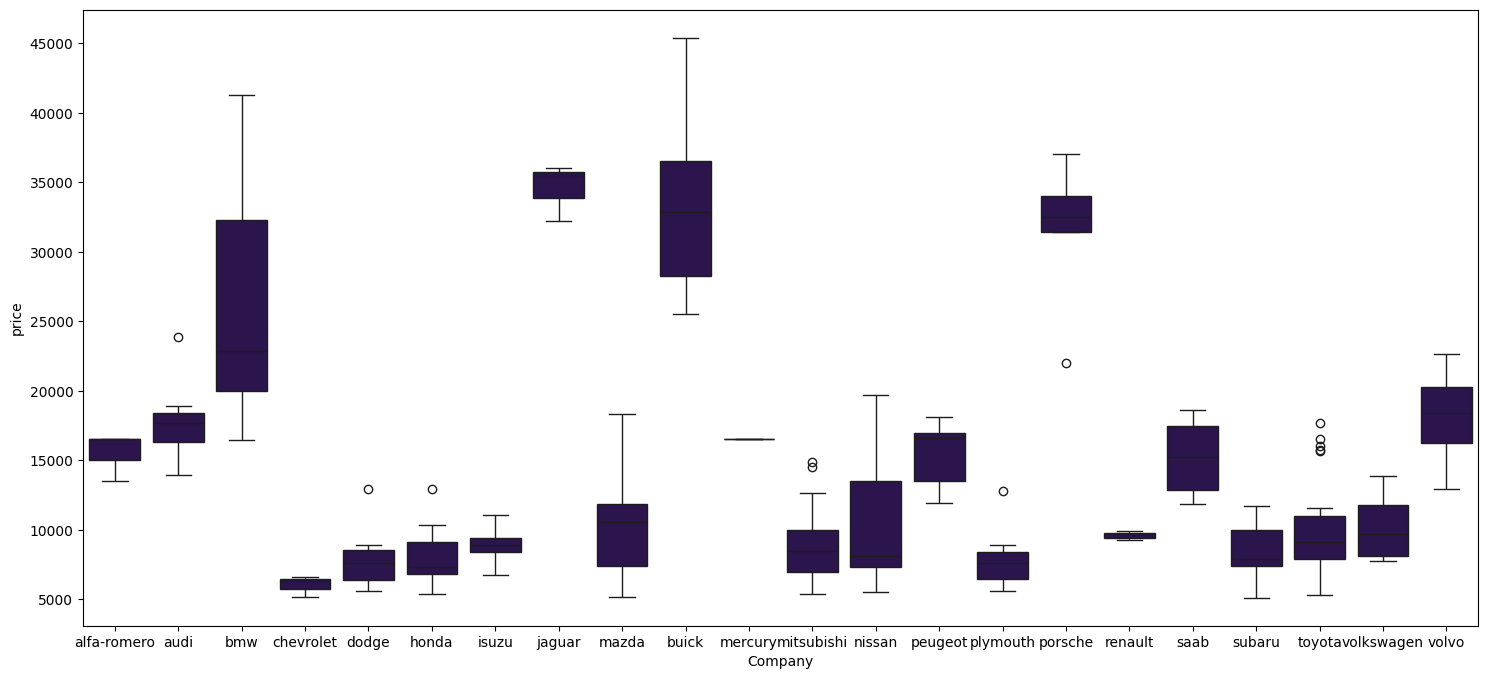

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'Company',y = 'price', data = dados_categorico,color = '#2B0A56')

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


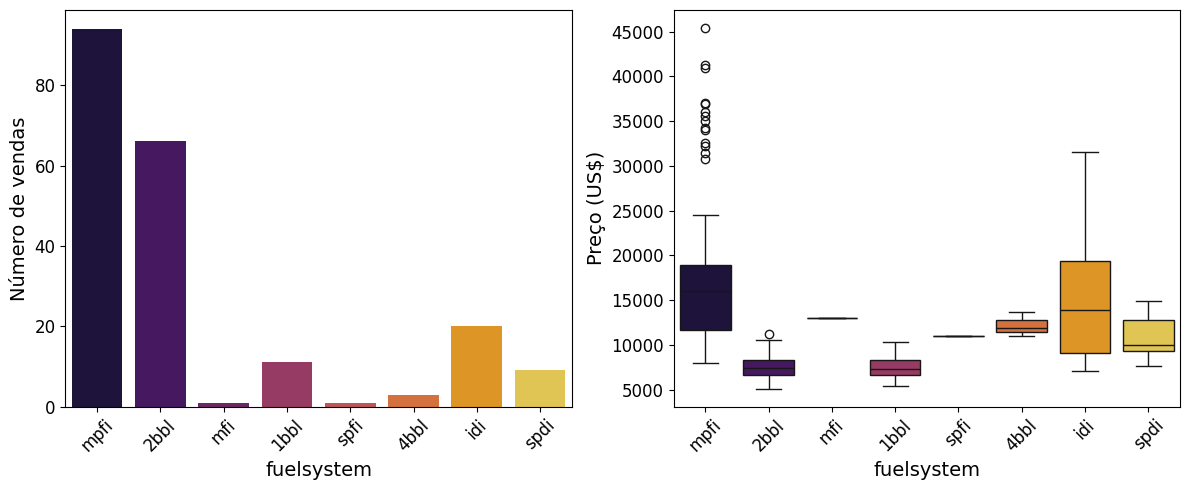

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count(x, position):
    # Cria o eixo 1: countplot
    ax1 = plt.subplot(1, 2, position)
    sns.countplot(
        x=x,
        data=dados_categorico,
        palette="inferno",
        ax=ax1
    )
    ax1.set_xlabel(x, fontsize=14)
    ax1.set_ylabel("Número de vendas", fontsize=14)
    ax1.tick_params(axis="x", labelrotation=45, labelsize=12)  # tick x
    ax1.tick_params(axis="y", labelsize=12)                   # tick y

    # Cria o eixo 2: boxplot
    ax2 = plt.subplot(1, 2, position + 1)
    sns.boxplot(
        x=x,
        y="price",
        data=dados_categorico,
        palette="inferno",
        ax=ax2
    )
    ax2.set_xlabel(x, fontsize=14)
    ax2.set_ylabel("Preço (US$)", fontsize=14)
    ax2.tick_params(axis="x", labelrotation=45, labelsize=12)
    ax2.tick_params(axis="y", labelsize=12)

# Exemplo de uso:
plt.figure(figsize=(12, 5))
plot_count("fuelsystem", 1)
plt.tight_layout()
plt.savefig("fuelsystem_final.pdf", format="pdf", dpi=300)
plt.show()


/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


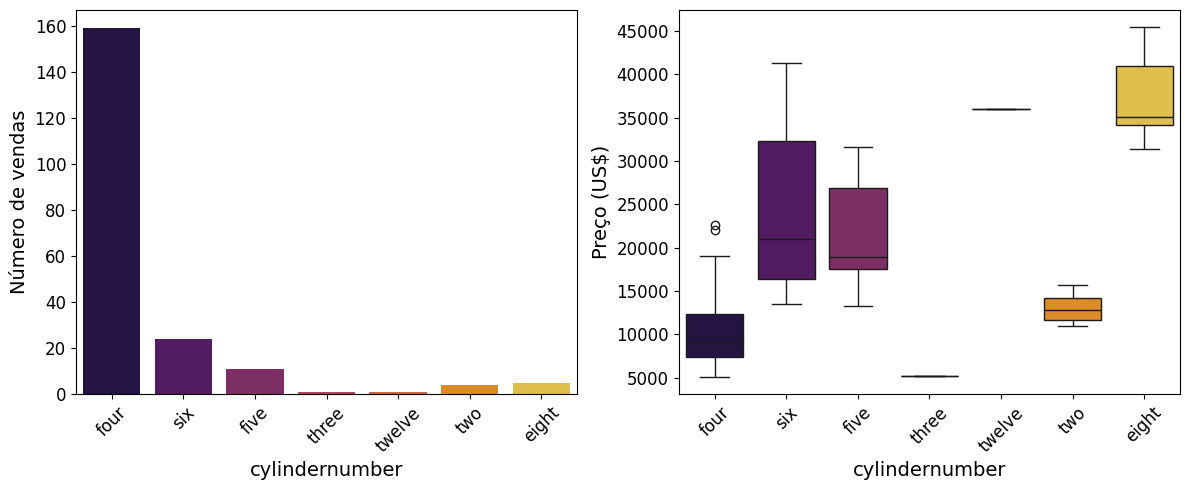

In [63]:
plt.figure(figsize=(12, 5))
plot_count("cylindernumber", 1)
plt.tight_layout()
plt.savefig("cylindernumber_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


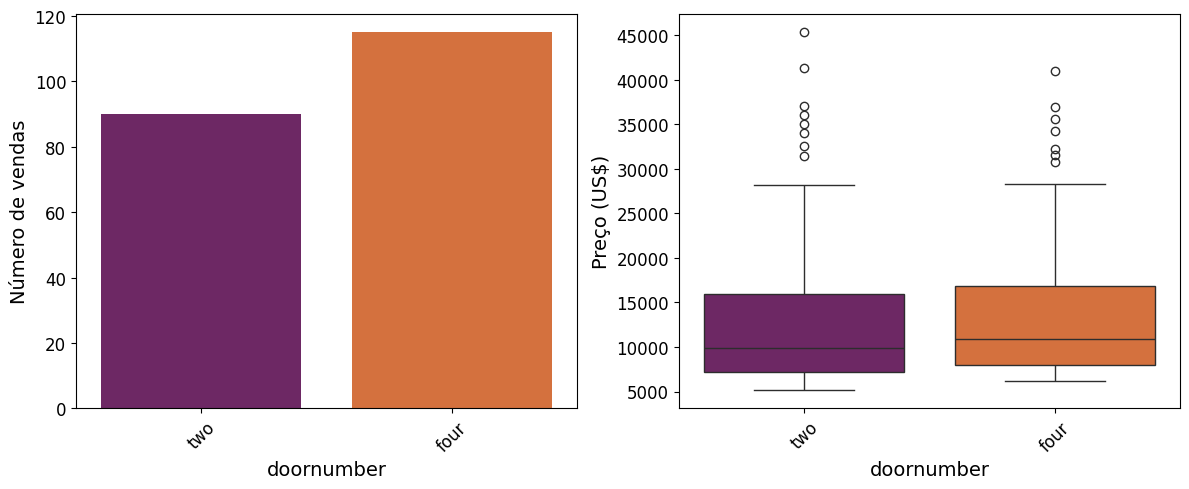

In [64]:
plt.figure(figsize=(12, 5))
plot_count("doornumber", 1)
plt.tight_layout()
plt.savefig("doornumber_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


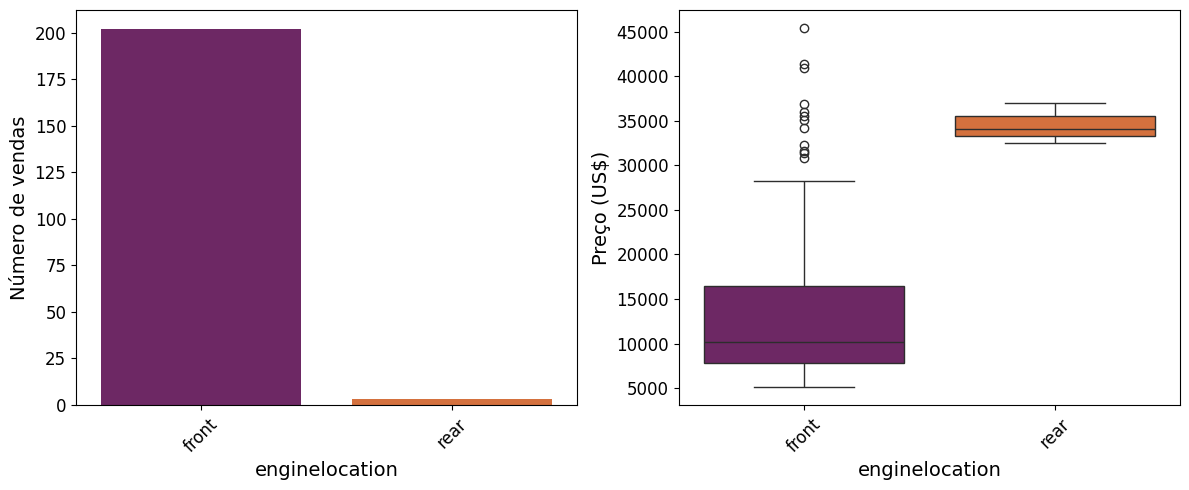

In [65]:
plt.figure(figsize=(12, 5))
plot_count("enginelocation", 1)
plt.tight_layout()
plt.savefig("enginelocation_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


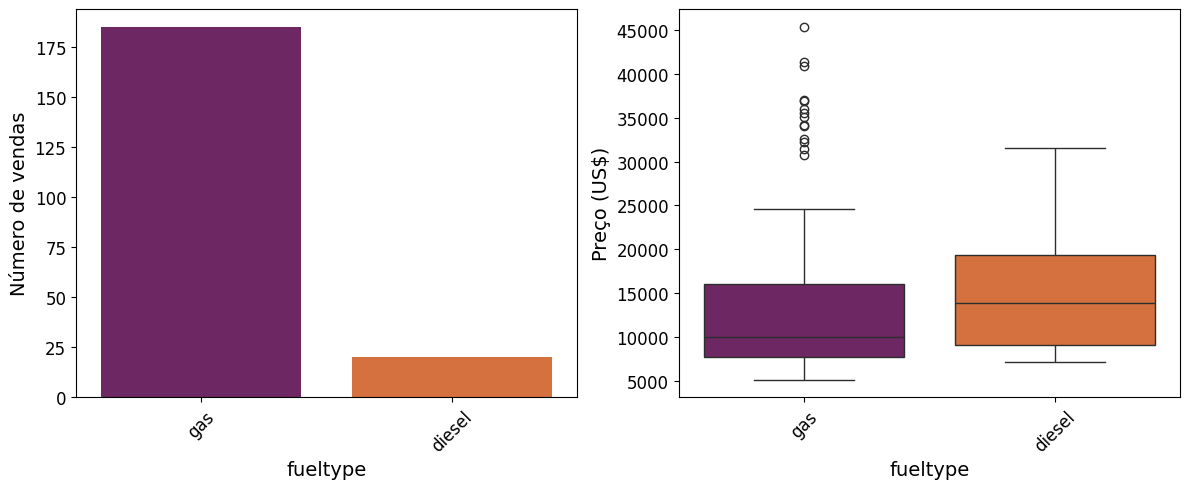

In [66]:
plt.figure(figsize=(12, 5))
plot_count("fueltype", 1)
plt.tight_layout()
plt.savefig("fueltype_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


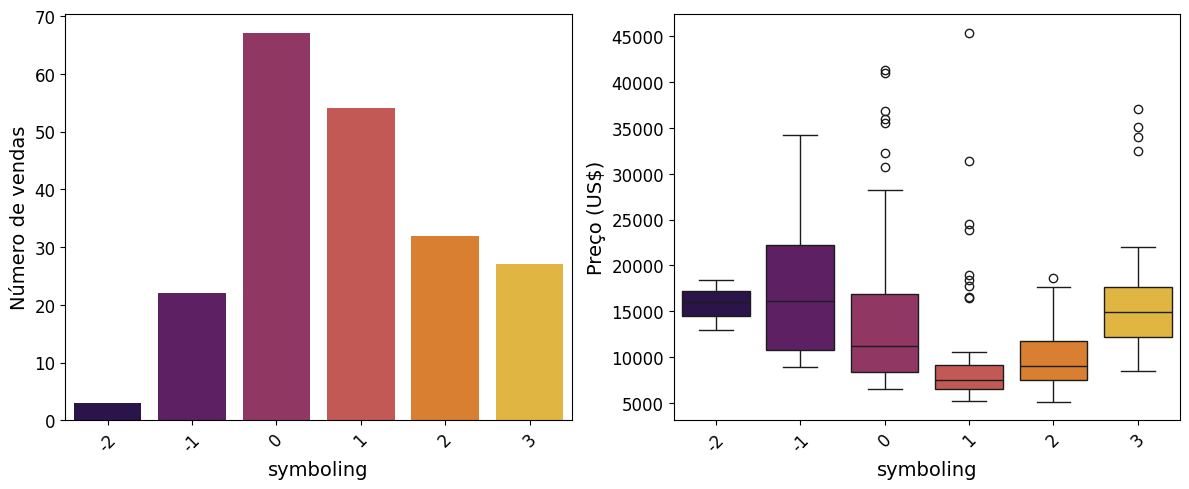

In [67]:
plt.figure(figsize=(12, 5))
plot_count("symboling", 1)
plt.tight_layout()
plt.savefig("symboling_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


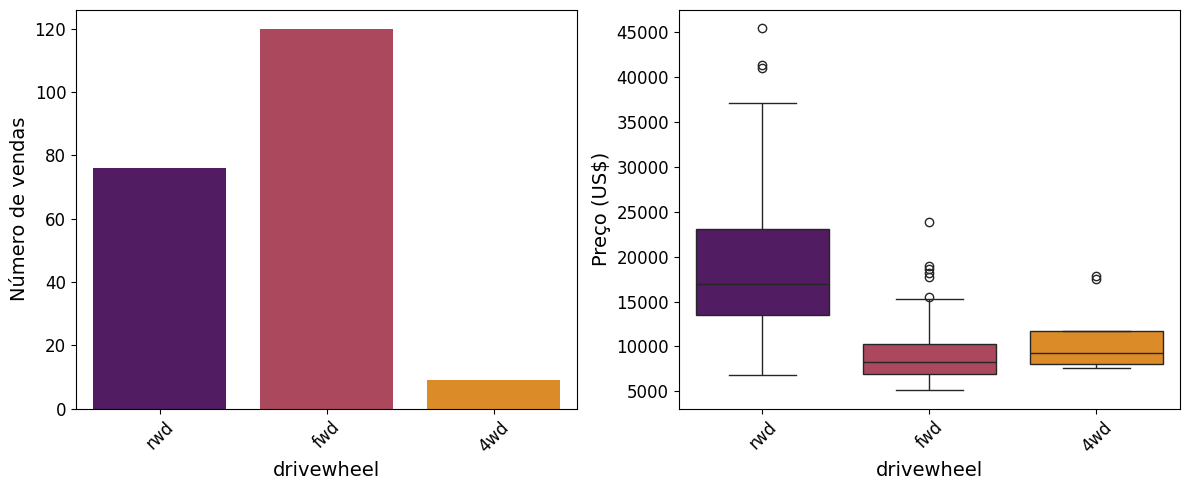

In [68]:
plt.figure(figsize=(12, 5))
plot_count("drivewheel", 1)
plt.tight_layout()
plt.savefig("drivewheel_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


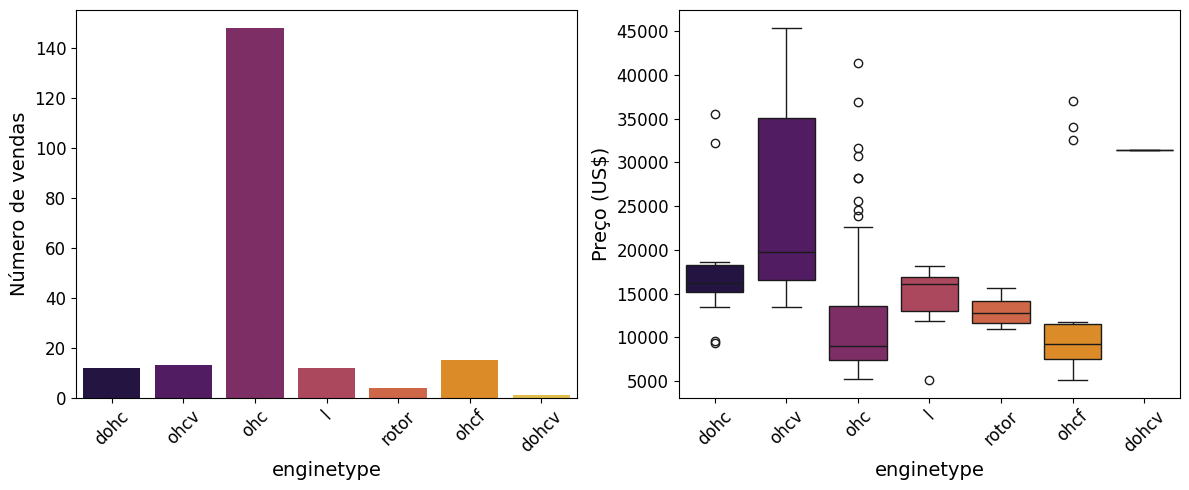

In [69]:
plt.figure(figsize=(12, 5))
plot_count("enginetype", 1)
plt.tight_layout()
plt.savefig("enginetype_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


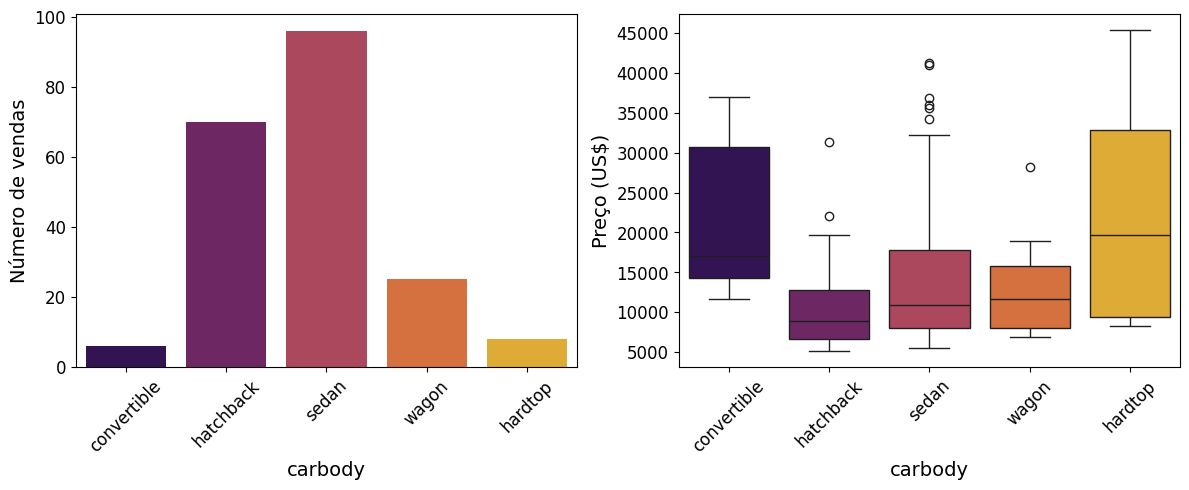

In [70]:
plt.figure(figsize=(12, 5))
plot_count("carbody", 1)
plt.tight_layout()
plt.savefig("carbody_final.pdf", format="pdf", dpi=300)
plt.show()

/tmp/ipython-input-62-2869404595.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-62-2869404595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


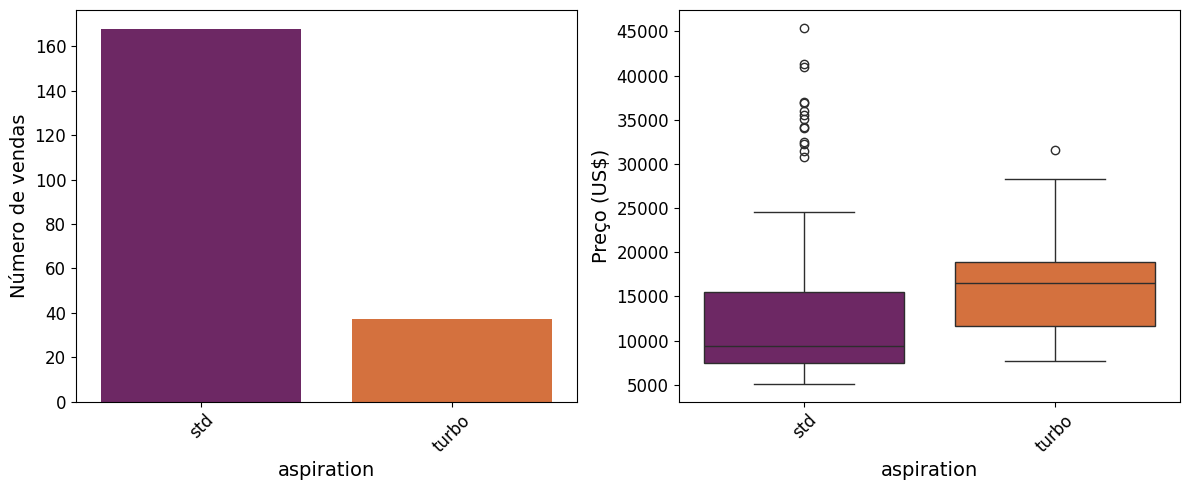

In [71]:
plt.figure(figsize=(12, 5))
plot_count("aspiration", 1)
plt.tight_layout()
plt.savefig("aspiration_final.pdf", format="pdf", dpi=300)
plt.show()

In [57]:
def plot_count(x, fig):
    plt.subplot(1, 2, fig)
    sns.countplot(x=dados_categorico[x], palette="inferno")
    plt.ylabel('Número de vendas', fontsize = 14)
    plt.xticks(rotation=45,fontsize = 14)  # rotação leve se os rótulos forem longos

    plt.subplot(1, 2, fig + 1)
    plt.ylabel('Preço (US$)', fontsize = 14)
    sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")
    plt.xticks(rotation=45,fontsize = 14)

plt.figure(figsize=(12,5))


fig = plot_count('fuelsystem',1)

plt.tight_layout()
plt.savefig('fuelsystem.pdf', format='pdf', dpi=300)
plt.show()


/tmp/ipython-input-57-4089066487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
/tmp/ipython-input-57-4089066487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno", fontsize = 14)


TypeError: Axes.bxp() got an unexpected keyword argument 'fontsize'

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


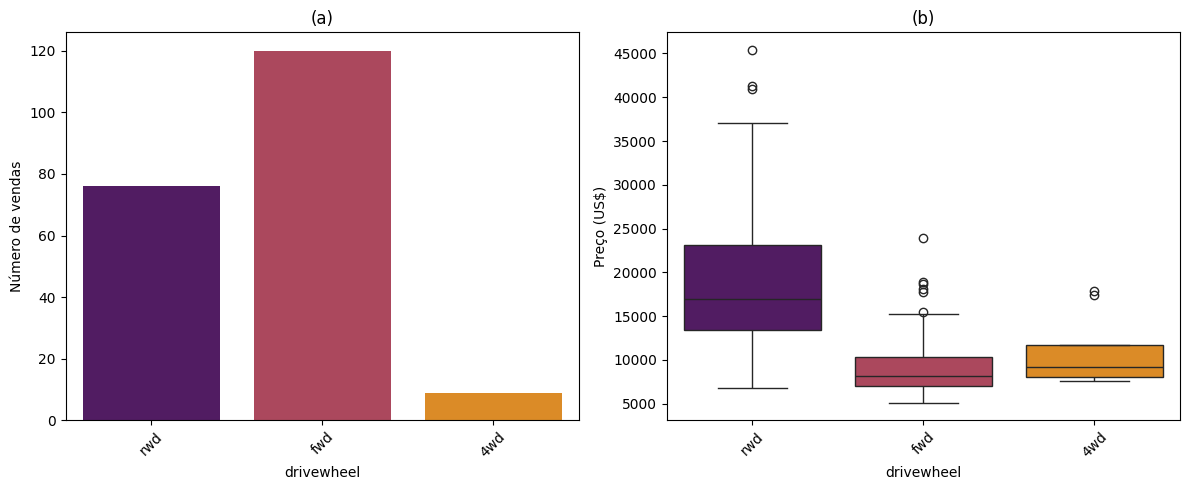

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('drivewheel', 1)
plt.tight_layout()
plt.savefig('drivewheel.pdf', format='pdf', dpi=300)

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


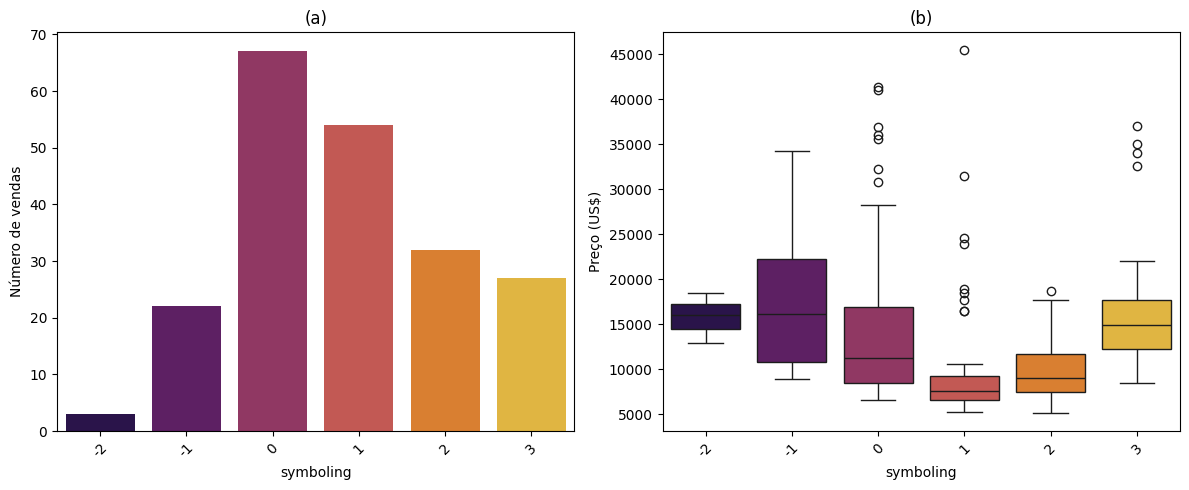

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('symboling', 1)
plt.tight_layout()
plt.savefig('symboling.pdf', format='pdf', dpi=300)

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


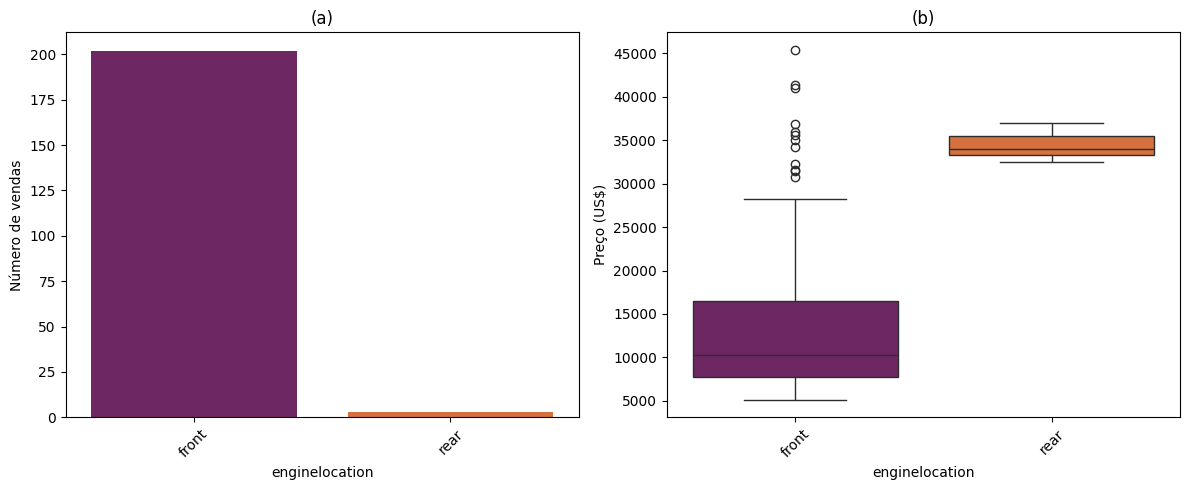

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('enginelocation', 1)
plt.tight_layout()
plt.savefig('enginelocation.pdf', format='pdf', dpi=300)

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


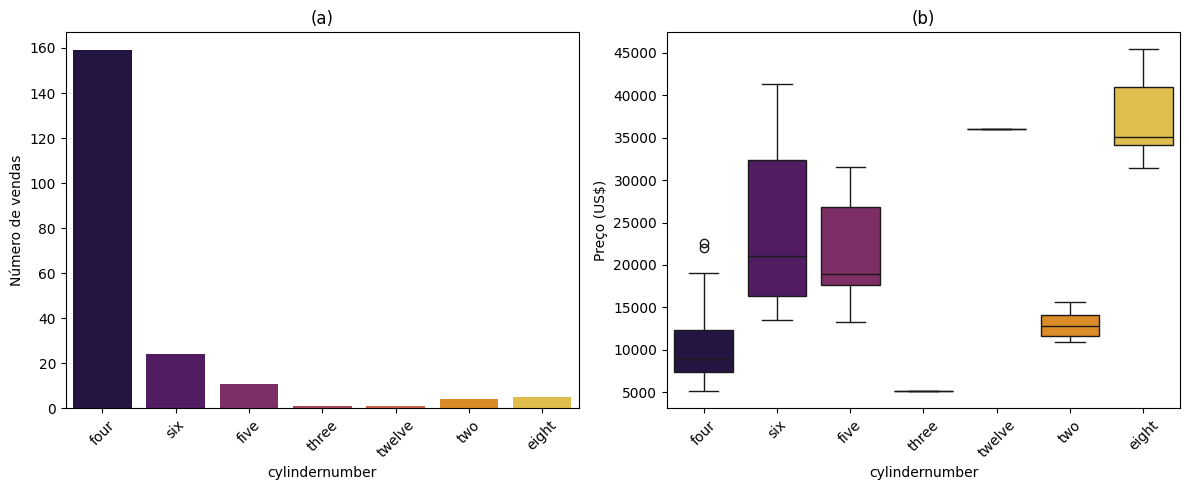

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('cylindernumber', 1)
plt.tight_layout()
plt.savefig('cylindernumber.pdf', format='pdf', dpi=300)

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


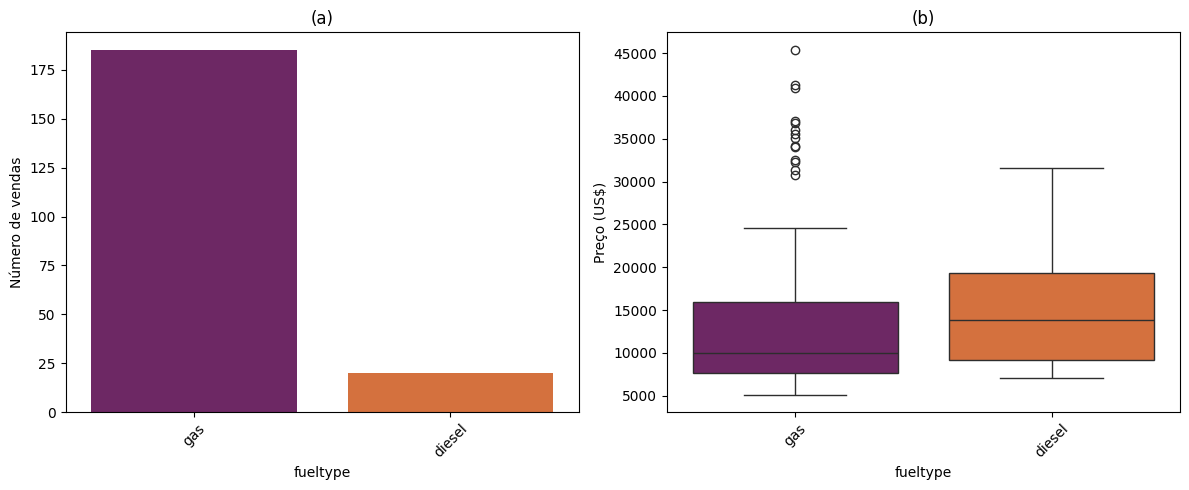

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('fueltype', 1)
plt.tight_layout()
plt.savefig('fueltype.pdf', format='pdf', dpi=300)

/tmp/ipython-input-15-4028946338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
/tmp/ipython-input-15-4028946338.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


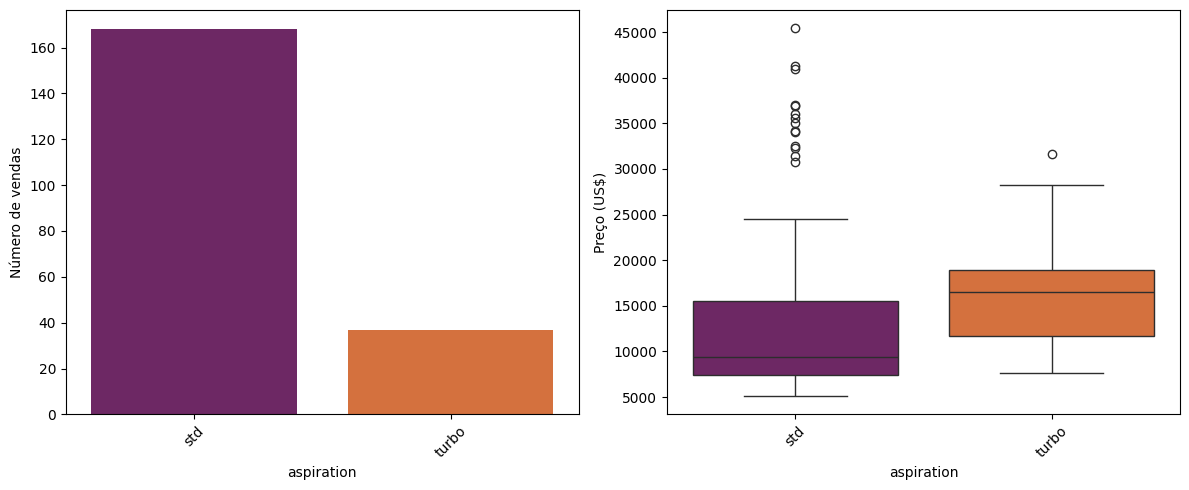

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('aspiration', 1)
plt.tight_layout()
plt.savefig('aspiration.pdf', format='pdf', dpi=300)

/tmp/ipython-input-15-4028946338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
/tmp/ipython-input-15-4028946338.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


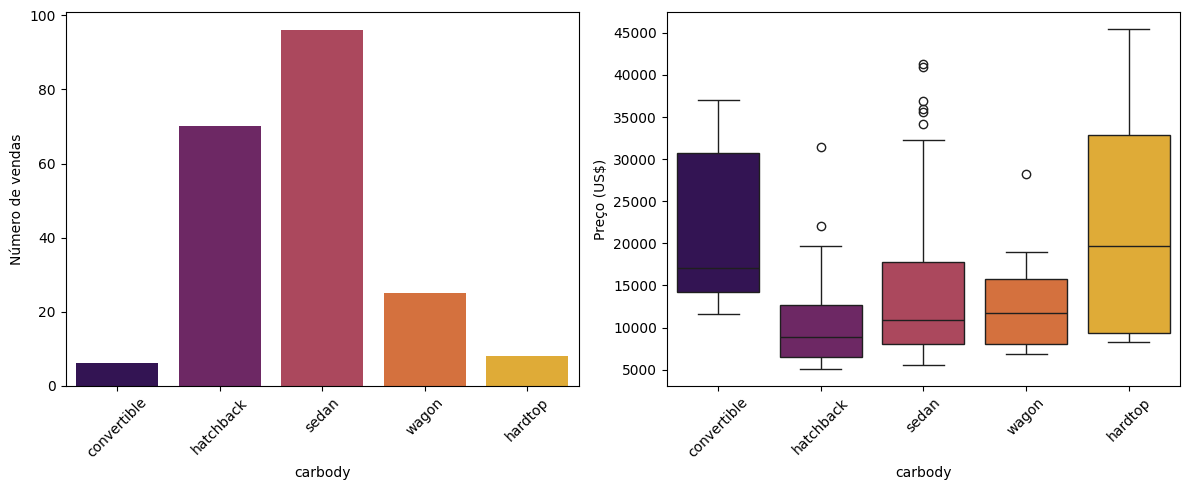

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('carbody', 1)
plt.tight_layout()
plt.savefig('carbody.pdf', format='pdf', dpi=300)

<ipython-input-46-5b07c30dc1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-46-5b07c30dc1e3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="inferno")


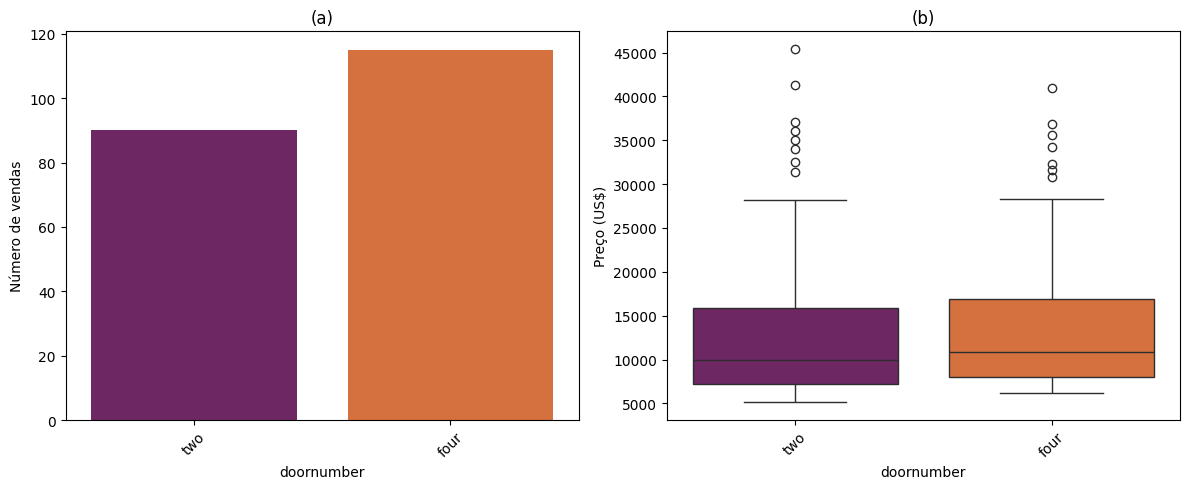

In [ ]:
plt.figure(figsize=(12,5))
fig = plot_count('doornumber', 1)
plt.tight_layout()
plt.savefig('doornumber.pdf', format='pdf', dpi=300)

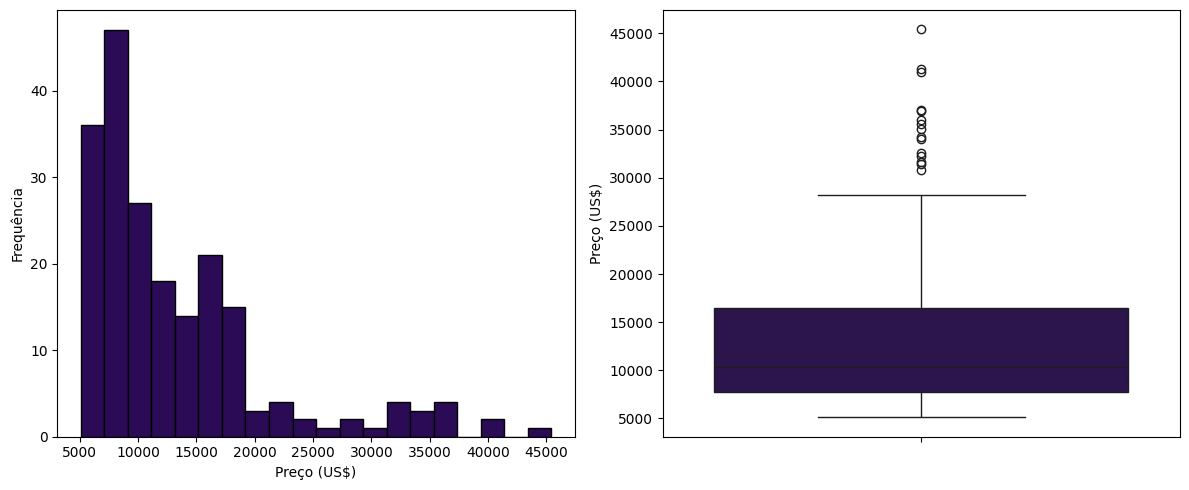

In [ ]:
# Define a figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de Preços
sns.histplot(data=dados, x='price', bins=20, ax=axes[0], color= '#2B0A56', alpha = 1.0)

axes[0].set_xlabel("Preço (US$)")
axes[0].set_ylabel("Frequência")

# Boxplot de Preços
sns.boxplot(data=dados, y='price', ax=axes[1], color='#2B0A56')

axes[1].set_ylabel("Preço (US$)")
axes[1].set_xlabel("")

plt.tight_layout()
plt.savefig('histograma_preco_original.pdf', format='pdf', dpi=300)
plt.show()

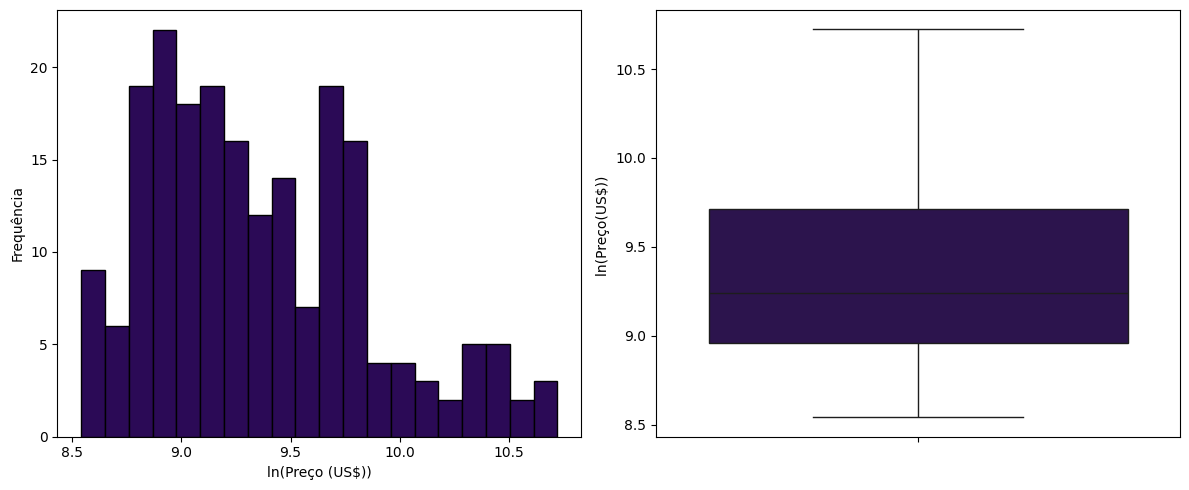

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de Preços
sns.histplot(data=dados, x='price', bins=20, ax=axes[0], color= '#2B0A56', alpha = 1.0)  # tom escuro da paleta inferno

axes[0].set_xlabel("ln(Preço (US$))")
axes[0].set_ylabel("Frequência")

# Boxplot de Preços
sns.boxplot(data=dados, y='price', ax=axes[1], color='#2B0A56')  # tom claro da paleta inferno

axes[1].set_ylabel("ln(Preço(US$)) ")
axes[1].set_xlabel("")

plt.tight_layout()
plt.savefig('histograma_preco.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
dados_categorico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   symboling       205 non-null    object 
 2   fueltype        205 non-null    object 
 3   Company         205 non-null    object 
 4   aspiration      205 non-null    object 
 5   doornumber      205 non-null    object 
 6   carbody         205 non-null    object 
 7   drivewheel      205 non-null    object 
 8   enginelocation  205 non-null    object 
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  fuelsystem      205 non-null    object 
dtypes: float64(1), object(11)
memory usage: 19.3+ KB


<ipython-input-58-b9640b459849>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dados_categorico[x], palette="inferno")
<ipython-input-58-b9640b459849>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dados_categorico[x], y=dados_categorico.price, palette="rainbow")


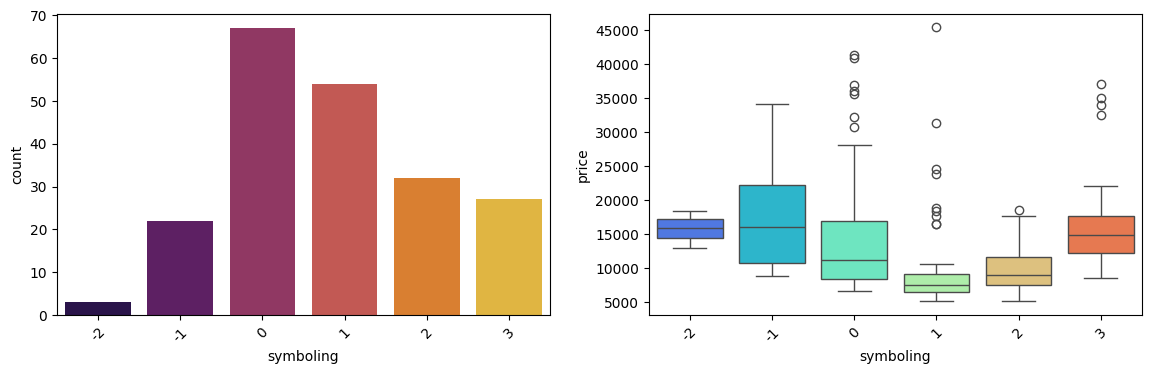

In [ ]:

plt.figure(figsize=(14,18))
plot_count('symboling',5)

In [ ]:
dados_categorico['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [ ]:
pd.crosstab(dados_categorico["fueltype"], dados_categorico["aspiration"])

aspiration,std,turbo
fueltype,,
diesel,7,13
gas,161,24
